___
# Project-09_Covid US
___

In [2]:
!pip install feature-engine

In [3]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser

import os,sys
import warnings
warnings.filterwarnings('ignore')

* We have datawise sorted information on COVID-19 in different csv files.
* The dates are from 13th of April to 29th of September.
* Every files has the data of every state on that particular order.
* We will merge all the datasfiles to form single dataframe fro processing.

In [4]:
folder = 'data/'

In [5]:
pd.read_csv('data/04-13-2020.csv').columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [6]:
df = pd.DataFrame(columns=['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'])

for file in os.listdir(folder):
    if file.endswith('.csv'):
        print(file)
        df= df.append(pd.read_csv('data/{}'.format(file)),ignore_index=True)

05-06-2020.csv
08-13-2020.csv
09-18-2020.csv
07-17-2020.csv
06-15-2020.csv
09-23-2020.csv
06-16-2020.csv
08-24-2020.csv
09-03-2020.csv
07-12-2020.csv
08-09-2020.csv
07-29-2020.csv
05-16-2020.csv
09-21-2020.csv
05-24-2020.csv
09-26-2020.csv
05-18-2020.csv
08-11-2020.csv
08-20-2020.csv
09-17-2020.csv
04-14-2020.csv
05-30-2020.csv
08-12-2020.csv
08-25-2020.csv
08-22-2020.csv
04-30-2020.csv
08-16-2020.csv
06-03-2020.csv
06-11-2020.csv
07-16-2020.csv
07-09-2020.csv
04-26-2020.csv
06-08-2020.csv
09-01-2020.csv
06-04-2020.csv
09-12-2020.csv
08-01-2020.csv
06-19-2020.csv
04-23-2020.csv
09-10-2020.csv
09-06-2020.csv
07-22-2020.csv
07-04-2020.csv
08-27-2020.csv
07-10-2020.csv
05-27-2020.csv
07-14-2020.csv
06-21-2020.csv
06-25-2020.csv
06-26-2020.csv
05-20-2020.csv
09-05-2020.csv
05-23-2020.csv
08-23-2020.csv
07-03-2020.csv
06-17-2020.csv
06-01-2020.csv
09-16-2020.csv
07-08-2020.csv
07-31-2020.csv
05-26-2020.csv
09-19-2020.csv
05-17-2020.csv
05-05-2020.csv
05-25-2020.csv
08-08-2020.csv
08-14-2020

In [7]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-07 02:32:32,32.3182,-86.9023,8691,343,NaN,8348.0,1,185.352760,109516.0,1158.0,3.946611,84000001,USA,2335.645249,13.324128
1,Alaska,US,2020-05-07 02:32:32,61.3707,-152.4044,372,10,284.0,78.0,2,62.233479,23655.0,NaN,2.688172,84000002,USA,3957.346645,NaN
2,American Samoa,US,2020-05-07 02:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN
3,Arizona,US,2020-05-07 02:32:32,33.7298,-111.4312,9707,426,1693.0,7588.0,4,133.361415,91737.0,1430.0,4.388586,84000004,USA,1260.345745,14.731637
4,Arkansas,US,2020-05-07 02:32:32,34.9697,-92.3731,3611,87,2109.0,1415.0,5,139.473246,59003.0,453.0,2.409305,84000005,USA,2278.964260,12.545001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,Virginia,US,2020-09-01 04:30:22,37.7693,-78.1700,120575,2580,15085.0,102910.0,51,1412.626461,1586551.0,NaN,2.139747,84000051,USA,18587.633628,NaN
9815,Washington,US,2020-09-01 04:30:22,47.4009,-121.4905,74635,1915,NaN,72720.0,53,980.118828,1461354.0,NaN,2.565820,84000053,USA,19190.735838,NaN
9816,West Virginia,US,2020-09-01 04:30:22,38.4912,-80.9545,10249,215,8017.0,2017.0,54,571.883891,436047.0,NaN,2.097766,84000054,USA,24330.984010,NaN
9817,Wisconsin,US,2020-09-01 04:30:22,44.2685,-89.6165,75603,1122,67234.0,7247.0,55,1298.477578,1253422.0,NaN,1.484068,84000055,USA,21527.457417,NaN


In [8]:
# shape of the dataframe
df.shape

(9819, 18)

In [9]:
# datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        9819 non-null   object 
 1   Country_Region        9819 non-null   object 
 2   Last_Update           9803 non-null   object 
 3   Lat                   9464 non-null   float64
 4   Long_                 9464 non-null   float64
 5   Confirmed             9819 non-null   object 
 6   Deaths                9819 non-null   object 
 7   Recovered             7722 non-null   float64
 8   Active                9802 non-null   float64
 9   FIPS                  9802 non-null   object 
 10  Incident_Rate         9464 non-null   float64
 11  People_Tested         9464 non-null   float64
 12  People_Hospitalized   5080 non-null   float64
 13  Mortality_Rate        9633 non-null   float64
 14  UID                   9819 non-null   object 
 15  ISO3                 

In [10]:
# decription of the dataatype
df.describe()

,Lat,Long_,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,9464.000000,9464.000000,7722.000000,9802.000000,9464.000000,9.464000e+03,5080.000000,9633.000000,9464.000000,5080.000000
mean,36.840089,-85.206614,24551.163429,38452.113854,870.964546,7.522357e+05,6192.399606,3.525152,12358.523307,12.122465
std,10.789962,49.310817,52496.882350,89858.197452,757.363040,1.404163e+06,13838.257220,2.605318,10820.898862,5.228327
min,-14.271000,-170.132000,0.000000,-120720.000000,0.000000,3.000000e+00,2.000000,0.000000,5.391708,1.418440
25%,34.594600,-101.165775,1418.250000,1366.750000,227.512107,8.515325e+04,566.750000,1.775843,3785.717012,8.352006
50%,39.061850,-87.944200,6159.000000,8626.000000,644.222930,2.844505e+05,2032.500000,3.065811,9883.663508,11.257994
75%,42.361650,-76.970625,29403.500000,30120.750000,1364.481291,8.112562e+05,6060.250000,4.707609,18004.381875,15.253744
max,61.370700,145.673900,657407.000000,797078.000000,3551.265124,1.448485e+07,89995.000000,70.370370,79248.407610,38.501190


In [11]:
# check for any null values in the dataset

In [12]:
df.isna().sum()

Province_State             0
Country_Region             0
Last_Update               16
Lat                      355
Long_                    355
Confirmed                  0
Deaths                     0
Recovered               2097
Active                    17
FIPS                      17
Incident_Rate            355
People_Tested            355
People_Hospitalized     4739
Mortality_Rate           186
UID                        0
ISO3                       0
Testing_Rate             355
Hospitalization_Rate    4739
dtype: int64

In [13]:
# percentage of missing values in the dataframe
df.isna().mean()*100

Province_State           0.000000
Country_Region           0.000000
Last_Update              0.162949
Lat                      3.615439
Long_                    3.615439
Confirmed                0.000000
Deaths                   0.000000
Recovered               21.356554
Active                   0.173134
FIPS                     0.173134
Incident_Rate            3.615439
People_Tested            3.615439
People_Hospitalized     48.263571
Mortality_Rate           1.894287
UID                      0.000000
ISO3                     0.000000
Testing_Rate             3.615439
Hospitalization_Rate    48.263571
dtype: float64

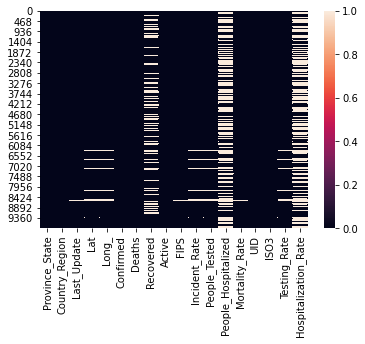

In [14]:
# plotting the missing values
sns.heatmap(df.isna())

* There are a lot of missing values in the dataset.

In [15]:
# check the correlation between the features

In [16]:
df.corr()

,Lat,Long_,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,-0.043698,-0.008340,0.123668,0.047842,0.020707,-0.030937,0.175836,0.020395
Long_,-0.278274,1.000000,-0.053407,-0.051700,-0.050548,-0.065787,0.118257,0.264204,0.055501,0.059990
Recovered,-0.043698,-0.053407,1.000000,0.296773,0.452061,0.657722,0.558800,-0.007765,0.253567,-0.012307
Active,-0.008340,-0.051700,0.296773,1.000000,0.469555,0.840755,0.804718,0.042838,0.263812,0.123026
Incident_Rate,0.123668,-0.050548,0.452061,0.469555,1.000000,0.496086,0.554291,-0.058964,0.694783,-0.127673
People_Tested,0.047842,-0.065787,0.657722,0.840755,0.496086,1.000000,0.822780,0.029520,0.454998,0.104259
People_Hospitalized,0.020707,0.118257,0.558800,0.804718,0.554291,0.822780,1.000000,0.430829,0.365628,0.331134
Mortality_Rate,-0.030937,0.264204,-0.007765,0.042838,-0.058964,0.029520,0.430829,1.000000,-0.088343,0.633881
Testing_Rate,0.175836,0.055501,0.253567,0.263812,0.694783,0.454998,0.365628,-0.088343,1.000000,-0.219563
Hospitalization_Rate,0.020395,0.059990,-0.012307,0.123026,-0.127673,0.104259,0.331134,0.633881,-0.219563,1.000000


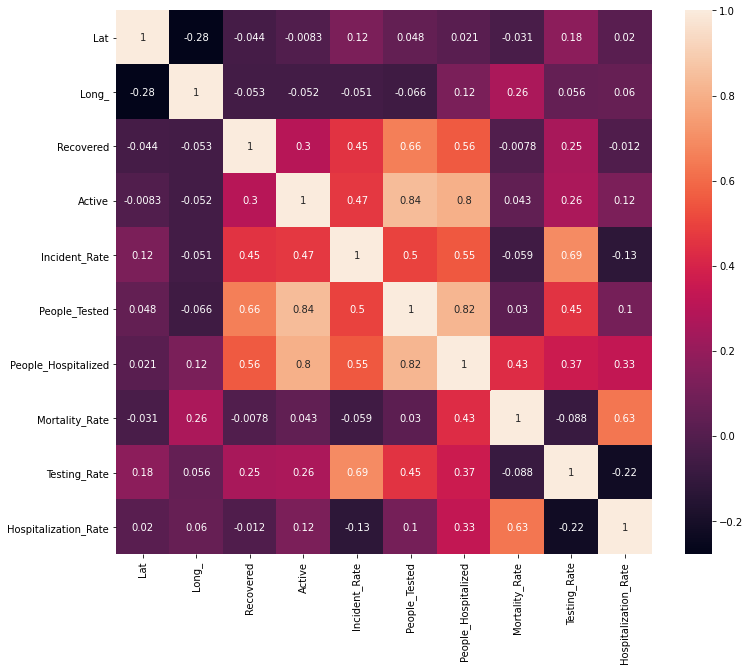

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot =True)

* We can note 2 pairs of high correlated features.
    * 1. Mortality Rate & Testing rate -> Negative correlation
    * 2. People Tested & People Hostitalized -> Positive Correlation
    * 3. People Tested & People Hospitalized -> Positive correlation

## Extracting some features

In [18]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-07 02:32:32,32.3182,-86.9023,8691,343,NaN,8348.0,1,185.352760,109516.0,1158.0,3.946611,84000001,USA,2335.645249,13.324128
1,Alaska,US,2020-05-07 02:32:32,61.3707,-152.4044,372,10,284.0,78.0,2,62.233479,23655.0,NaN,2.688172,84000002,USA,3957.346645,NaN
2,American Samoa,US,2020-05-07 02:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN
3,Arizona,US,2020-05-07 02:32:32,33.7298,-111.4312,9707,426,1693.0,7588.0,4,133.361415,91737.0,1430.0,4.388586,84000004,USA,1260.345745,14.731637
4,Arkansas,US,2020-05-07 02:32:32,34.9697,-92.3731,3611,87,2109.0,1415.0,5,139.473246,59003.0,453.0,2.409305,84000005,USA,2278.964260,12.545001


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        9819 non-null   object 
 1   Country_Region        9819 non-null   object 
 2   Last_Update           9803 non-null   object 
 3   Lat                   9464 non-null   float64
 4   Long_                 9464 non-null   float64
 5   Confirmed             9819 non-null   object 
 6   Deaths                9819 non-null   object 
 7   Recovered             7722 non-null   float64
 8   Active                9802 non-null   float64
 9   FIPS                  9802 non-null   object 
 10  Incident_Rate         9464 non-null   float64
 11  People_Tested         9464 non-null   float64
 12  People_Hospitalized   5080 non-null   float64
 13  Mortality_Rate        9633 non-null   float64
 14  UID                   9819 non-null   object 
 15  ISO3                 

* Note that the date has the object datatype, we have to change it to datatime datatype
* Confirmed and Deaths should be numberical type but are object time in this dataset, we have to change them too

In [20]:
df.Last_Update = pd.to_datetime(df.Last_Update)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        9819 non-null   object        
 1   Country_Region        9819 non-null   object        
 2   Last_Update           9803 non-null   datetime64[ns]
 3   Lat                   9464 non-null   float64       
 4   Long_                 9464 non-null   float64       
 5   Confirmed             9819 non-null   object        
 6   Deaths                9819 non-null   object        
 7   Recovered             7722 non-null   float64       
 8   Active                9802 non-null   float64       
 9   FIPS                  9802 non-null   object        
 10  Incident_Rate         9464 non-null   float64       
 11  People_Tested         9464 non-null   float64       
 12  People_Hospitalized   5080 non-null   float64       
 13  Mortality_Rate    

In [22]:
# sanity check!
df.Last_Update[3].month_name()

'May'

In [23]:
df.Confirmed = pd.to_numeric(df.Confirmed)
df.Deaths = pd.to_numeric(df.Deaths)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        9819 non-null   object        
 1   Country_Region        9819 non-null   object        
 2   Last_Update           9803 non-null   datetime64[ns]
 3   Lat                   9464 non-null   float64       
 4   Long_                 9464 non-null   float64       
 5   Confirmed             9819 non-null   int64         
 6   Deaths                9819 non-null   int64         
 7   Recovered             7722 non-null   float64       
 8   Active                9802 non-null   float64       
 9   FIPS                  9802 non-null   object        
 10  Incident_Rate         9464 non-null   float64       
 11  People_Tested         9464 non-null   float64       
 12  People_Hospitalized   5080 non-null   float64       
 13  Mortality_Rate    

In [25]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-07 02:32:32,32.3182,-86.9023,8691,343,NaN,8348.0,1,185.352760,109516.0,1158.0,3.946611,84000001,USA,2335.645249,13.324128
1,Alaska,US,2020-05-07 02:32:32,61.3707,-152.4044,372,10,284.0,78.0,2,62.233479,23655.0,NaN,2.688172,84000002,USA,3957.346645,NaN
2,American Samoa,US,2020-05-07 02:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN
3,Arizona,US,2020-05-07 02:32:32,33.7298,-111.4312,9707,426,1693.0,7588.0,4,133.361415,91737.0,1430.0,4.388586,84000004,USA,1260.345745,14.731637
4,Arkansas,US,2020-05-07 02:32:32,34.9697,-92.3731,3611,87,2109.0,1415.0,5,139.473246,59003.0,453.0,2.409305,84000005,USA,2278.964260,12.545001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,Virginia,US,2020-09-01 04:30:22,37.7693,-78.1700,120575,2580,15085.0,102910.0,51,1412.626461,1586551.0,NaN,2.139747,84000051,USA,18587.633628,NaN
9815,Washington,US,2020-09-01 04:30:22,47.4009,-121.4905,74635,1915,NaN,72720.0,53,980.118828,1461354.0,NaN,2.565820,84000053,USA,19190.735838,NaN
9816,West Virginia,US,2020-09-01 04:30:22,38.4912,-80.9545,10249,215,8017.0,2017.0,54,571.883891,436047.0,NaN,2.097766,84000054,USA,24330.984010,NaN
9817,Wisconsin,US,2020-09-01 04:30:22,44.2685,-89.6165,75603,1122,67234.0,7247.0,55,1298.477578,1253422.0,NaN,1.484068,84000055,USA,21527.457417,NaN


In [26]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-07 02:32:32,32.3182,-86.9023,8691,343,NaN,8348.0,1,185.352760,109516.0,1158.0,3.946611,84000001,USA,2335.645249,13.324128
1,Alaska,US,2020-05-07 02:32:32,61.3707,-152.4044,372,10,284.0,78.0,2,62.233479,23655.0,NaN,2.688172,84000002,USA,3957.346645,NaN
2,American Samoa,US,2020-05-07 02:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN
3,Arizona,US,2020-05-07 02:32:32,33.7298,-111.4312,9707,426,1693.0,7588.0,4,133.361415,91737.0,1430.0,4.388586,84000004,USA,1260.345745,14.731637
4,Arkansas,US,2020-05-07 02:32:32,34.9697,-92.3731,3611,87,2109.0,1415.0,5,139.473246,59003.0,453.0,2.409305,84000005,USA,2278.964260,12.545001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,Virginia,US,2020-09-01 04:30:22,37.7693,-78.1700,120575,2580,15085.0,102910.0,51,1412.626461,1586551.0,NaN,2.139747,84000051,USA,18587.633628,NaN
9815,Washington,US,2020-09-01 04:30:22,47.4009,-121.4905,74635,1915,NaN,72720.0,53,980.118828,1461354.0,NaN,2.565820,84000053,USA,19190.735838,NaN
9816,West Virginia,US,2020-09-01 04:30:22,38.4912,-80.9545,10249,215,8017.0,2017.0,54,571.883891,436047.0,NaN,2.097766,84000054,USA,24330.984010,NaN
9817,Wisconsin,US,2020-09-01 04:30:22,44.2685,-89.6165,75603,1122,67234.0,7247.0,55,1298.477578,1253422.0,NaN,1.484068,84000055,USA,21527.457417,NaN


In [27]:
# creating 3 new features day,month and week.

In [28]:
df['Month'] = df.Last_Update.apply(lambda x:x.month_name())
df['Day_of_Yr'] = df.Last_Update.apply(lambda x:x.dayofyear)
df['Week_of_Yr'] = df.Last_Update.apply(lambda x:x.weekofyear) 

In [29]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

In [30]:
px.scatter(df,df.Lat,df.Long_,color=df.Province_State)

In [31]:
## Univated Analysis

In [32]:
# Province

* These are the states of The States.

In [33]:
len(df.Province_State.value_counts())

59

In [34]:
# Confirmed

In [35]:
df.Confirmed

0         8691
1          372
2            0
3         9707
4         3611
         ...  
9814    120575
9815     74635
9816     10249
9817     75603
9818      3850
Name: Confirmed, Length: 9819, dtype: int64

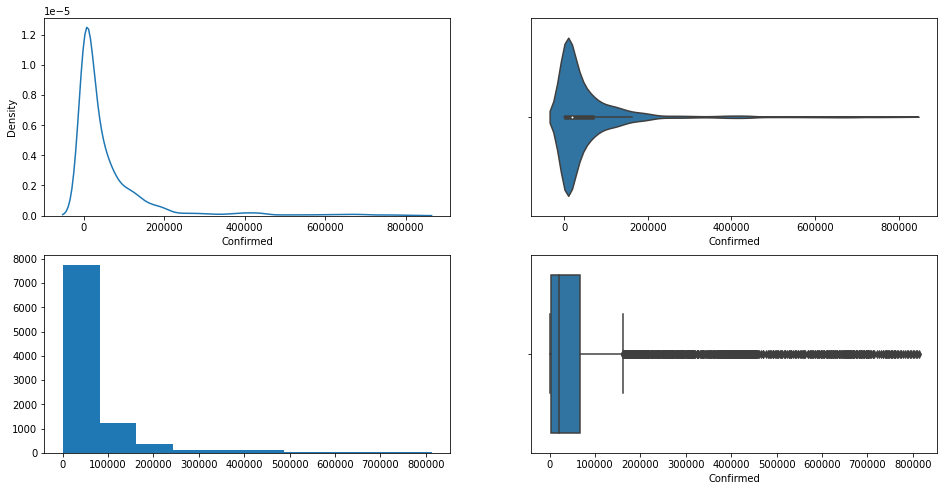

In [36]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df.Confirmed)

fig.add_subplot(222)
sns.violinplot(df.Confirmed,orient='h')

fig.add_subplot(223)
plt.hist(df.Confirmed)

fig.add_subplot(224)
sns.boxplot(df.Confirmed)

In [37]:
df[df.Confirmed == 0]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Month,Day_of_Yr,Week_of_Yr
2,American Samoa,US,2020-05-07 02:32:32,-14.271,-170.132,0,0,NaN,0.0,60,0.0,83.0,NaN,NaN,16,ASM,149.170576,NaN,May,128.0,19.0
60,American Samoa,US,2020-08-14 04:30:24,-14.271,-170.132,0,0,NaN,0.0,60,0.0,1396.0,NaN,NaN,16,ASM,2508.941248,NaN,August,227.0,33.0
118,American Samoa,US,2020-09-19 04:30:26,-14.271,-170.132,0,0,NaN,0.0,60,0.0,1571.0,NaN,NaN,16,ASM,2823.457522,NaN,September,263.0,38.0
176,American Samoa,US,2020-07-18 04:34:58,-14.271,-170.132,0,0,NaN,0.0,60,0.0,1037.0,NaN,NaN,16,ASM,1863.733578,NaN,July,200.0,29.0
234,American Samoa,US,2020-06-16 04:33:22,-14.271,-170.132,0,0,NaN,0.0,60,0.0,174.0,NaN,NaN,16,ASM,312.719038,NaN,June,168.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9531,American Samoa,US,2020-06-10 04:07:14,-14.271,-170.132,0,0,NaN,0.0,60,0.0,174.0,NaN,NaN,16,ASM,312.719038,NaN,June,162.0,24.0
9589,American Samoa,US,2020-09-09 04:30:32,-14.271,-170.132,0,0,NaN,0.0,60,0.0,1571.0,NaN,NaN,16,ASM,2823.457522,NaN,September,253.0,37.0
9647,American Samoa,US,2020-05-16 02:32:24,-14.271,-170.132,0,0,NaN,0.0,60,0.0,105.0,NaN,NaN,16,ASM,188.709764,NaN,May,137.0,20.0
9705,American Samoa,US,2020-06-01 02:32:54,-14.271,-170.132,0,0,NaN,0.0,60,0.0,174.0,NaN,NaN,16,ASM,312.719038,NaN,June,153.0,23.0


In [38]:
df[df.Confirmed > 400000]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Month,Day_of_Yr,Week_of_Yr
63,California,US,2020-08-14 04:30:24,36.1162,-119.6816,597984,10870,NaN,587114.0,6,1513.415228,9445493.0,NaN,1.817774,84000006,USA,23905.243195,NaN,August,227.0,33.0
69,Florida,US,2020-08-14 04:30:24,27.7663,-81.6868,557137,8913,NaN,548224.0,12,2594.020962,4122118.0,32947.0,1.599786,84000012,USA,19192.515487,5.913626,August,227.0,33.0
94,New York,US,2020-08-14 04:30:24,42.1657,-74.9481,423440,32805,73907.0,316728.0,36,2176.670893,6816381.0,89995.0,7.747261,84000036,USA,35039.245514,21.253306,August,227.0,33.0
107,Texas,US,2020-08-14 04:30:24,31.0545,-97.5635,530857,9771,375760.0,145326.0,48,1830.801416,4230763.0,NaN,1.840609,84000048,USA,14590.910343,NaN,August,227.0,33.0
121,California,US,2020-09-19 04:30:26,36.1162,-119.6816,779491,14893,NaN,764598.0,6,1972.784472,13177186.0,NaN,1.910606,84000006,USA,33349.644742,NaN,September,263.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Texas,US,2020-09-09 04:30:32,31.0545,-97.5635,662427,13792,553409.0,95226.0,48,2284.555520,5339126.0,NaN,2.082041,84000048,USA,18413.394647,NaN,September,253.0,37.0
9766,California,US,2020-09-01 04:30:22,36.1162,-119.6816,712475,13022,NaN,699453.0,6,1803.176197,11373305.0,NaN,1.827713,84000006,USA,28784.270123,NaN,September,245.0,36.0
9772,Florida,US,2020-09-01 04:30:22,27.7663,-81.6868,623471,11187,NaN,612284.0,12,2902.871005,4615539.0,NaN,1.794310,84000012,USA,21489.875772,NaN,September,245.0,36.0
9797,New York,US,2020-09-01 04:30:22,42.1657,-74.9481,434756,32957,75100.0,326699.0,36,2234.840192,8263033.0,NaN,7.580574,84000036,USA,42475.683501,NaN,September,245.0,36.0


* Highly skewed feature.

In [39]:
# Deaths

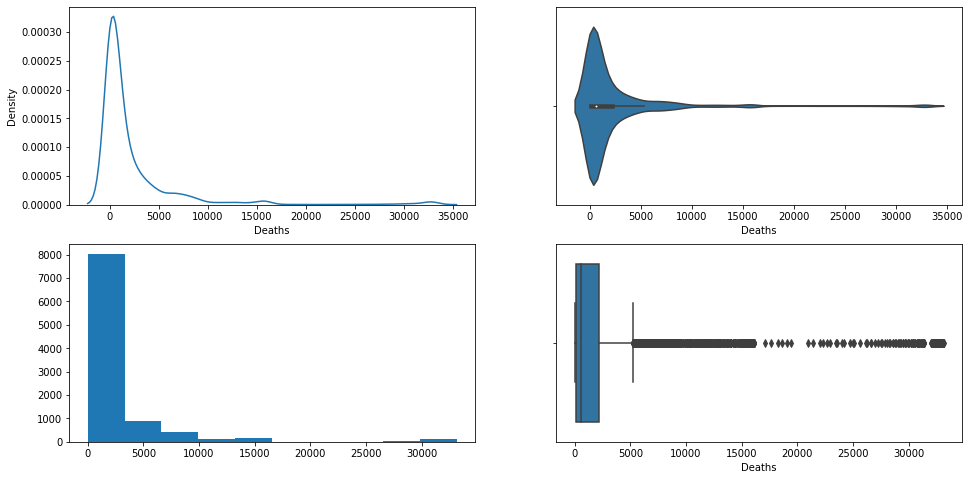

In [40]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df.Deaths)

fig.add_subplot(222)
sns.violinplot(df.Deaths,orient='h')

fig.add_subplot(223)
plt.hist(df.Deaths)

fig.add_subplot(224)
sns.boxplot(df.Deaths)

In [41]:
# recovered

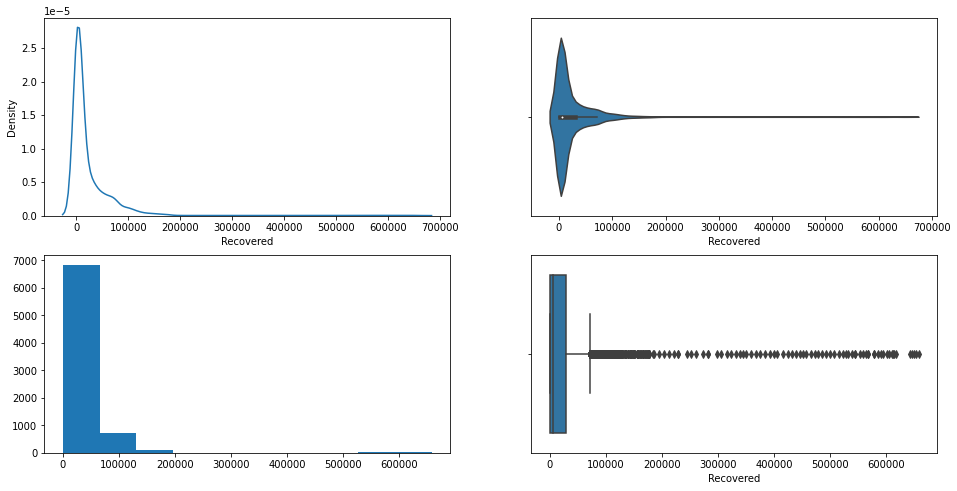

In [42]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df.Recovered)

fig.add_subplot(222)
sns.violinplot(df.Recovered,orient='h')

fig.add_subplot(223)
plt.hist(df.Recovered)

fig.add_subplot(224)
sns.boxplot(df.Recovered)

In [43]:
# active

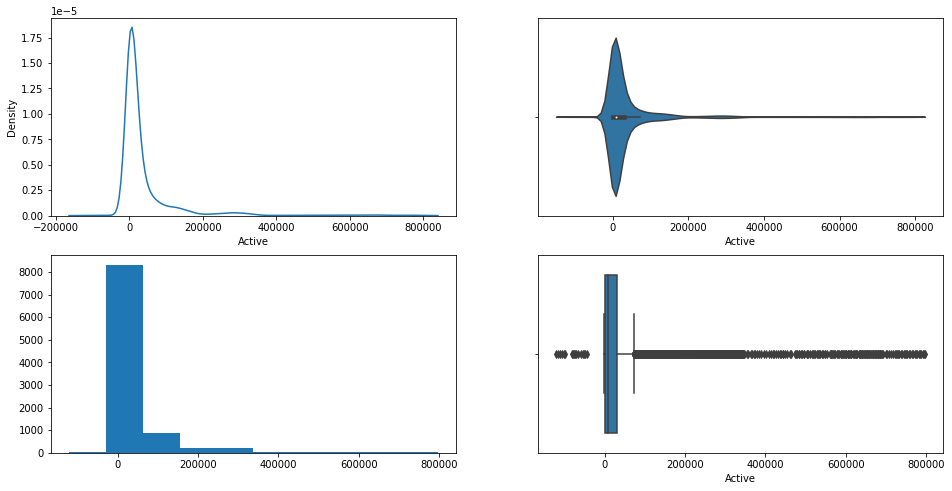

In [44]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df.Active)

fig.add_subplot(222)
sns.violinplot(df.Active,orient='h')

fig.add_subplot(223)
plt.hist(df.Active)

fig.add_subplot(224)
sns.boxplot(df.Active)

In [45]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Month,Day_of_Yr,Week_of_Yr
0,Alabama,US,2020-05-07 02:32:32,32.3182,-86.9023,8691,343,NaN,8348.0,1,185.352760,109516.0,1158.0,3.946611,84000001,USA,2335.645249,13.324128,May,128.0,19.0
1,Alaska,US,2020-05-07 02:32:32,61.3707,-152.4044,372,10,284.0,78.0,2,62.233479,23655.0,NaN,2.688172,84000002,USA,3957.346645,NaN,May,128.0,19.0
2,American Samoa,US,2020-05-07 02:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN,May,128.0,19.0
3,Arizona,US,2020-05-07 02:32:32,33.7298,-111.4312,9707,426,1693.0,7588.0,4,133.361415,91737.0,1430.0,4.388586,84000004,USA,1260.345745,14.731637,May,128.0,19.0
4,Arkansas,US,2020-05-07 02:32:32,34.9697,-92.3731,3611,87,2109.0,1415.0,5,139.473246,59003.0,453.0,2.409305,84000005,USA,2278.964260,12.545001,May,128.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,Virginia,US,2020-09-01 04:30:22,37.7693,-78.1700,120575,2580,15085.0,102910.0,51,1412.626461,1586551.0,NaN,2.139747,84000051,USA,18587.633628,NaN,September,245.0,36.0
9815,Washington,US,2020-09-01 04:30:22,47.4009,-121.4905,74635,1915,NaN,72720.0,53,980.118828,1461354.0,NaN,2.565820,84000053,USA,19190.735838,NaN,September,245.0,36.0
9816,West Virginia,US,2020-09-01 04:30:22,38.4912,-80.9545,10249,215,8017.0,2017.0,54,571.883891,436047.0,NaN,2.097766,84000054,USA,24330.984010,NaN,September,245.0,36.0
9817,Wisconsin,US,2020-09-01 04:30:22,44.2685,-89.6165,75603,1122,67234.0,7247.0,55,1298.477578,1253422.0,NaN,1.484068,84000055,USA,21527.457417,NaN,September,245.0,36.0


In [46]:
# LEt's see month wise Confiremd Cases the Entire nation

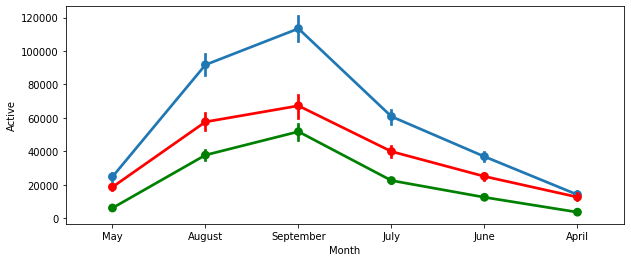

In [47]:
fig_this_size(10,4)
sns.pointplot(df.Month,df.Confirmed)
sns.pointplot(df.Month,df.Recovered,color='g')
sns.pointplot(df.Month,df.Active,color='r')

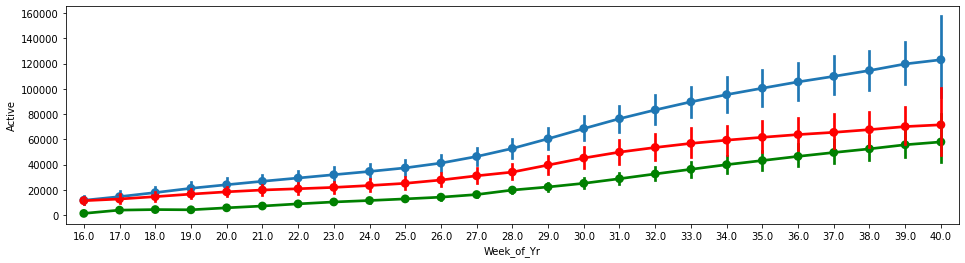

In [48]:
fig_this_size(16,4)
sns.pointplot(df.Week_of_Yr,df.Confirmed)
sns.pointplot(df.Week_of_Yr,df.Recovered,color='g')
sns.pointplot(df.Week_of_Yr,df.Active,color='r')

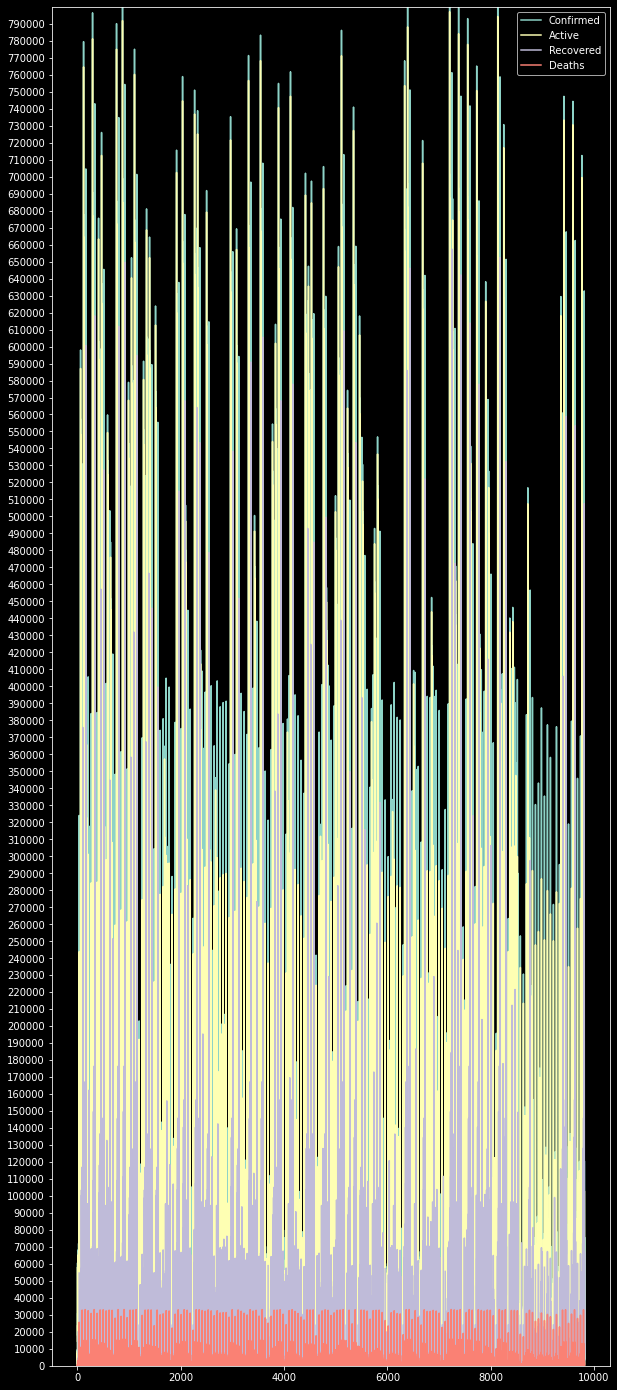

In [49]:
plt.style.use('dark_background')
plt.figure(figsize=(10,25))
df['Confirmed'].plot()
df['Active'].plot()
df['Recovered'].plot()
df['Deaths'].plot()
plt.ylim([0,800000])
plt.yticks(np.arange(0,800000 , step=10000));
plt.grid(False)
plt.legend()

In [50]:
# Confirmed  vs active 

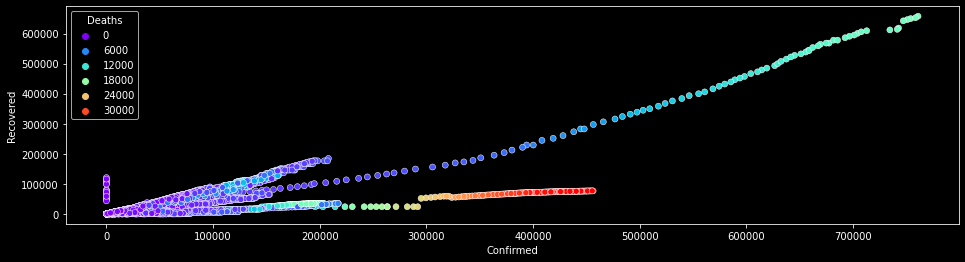

In [51]:
plt.style.use('dark_background')
fig_this_size(16,4)
sns.scatterplot(df.Confirmed,df.Recovered,hue=df.Deaths,palette='rainbow')

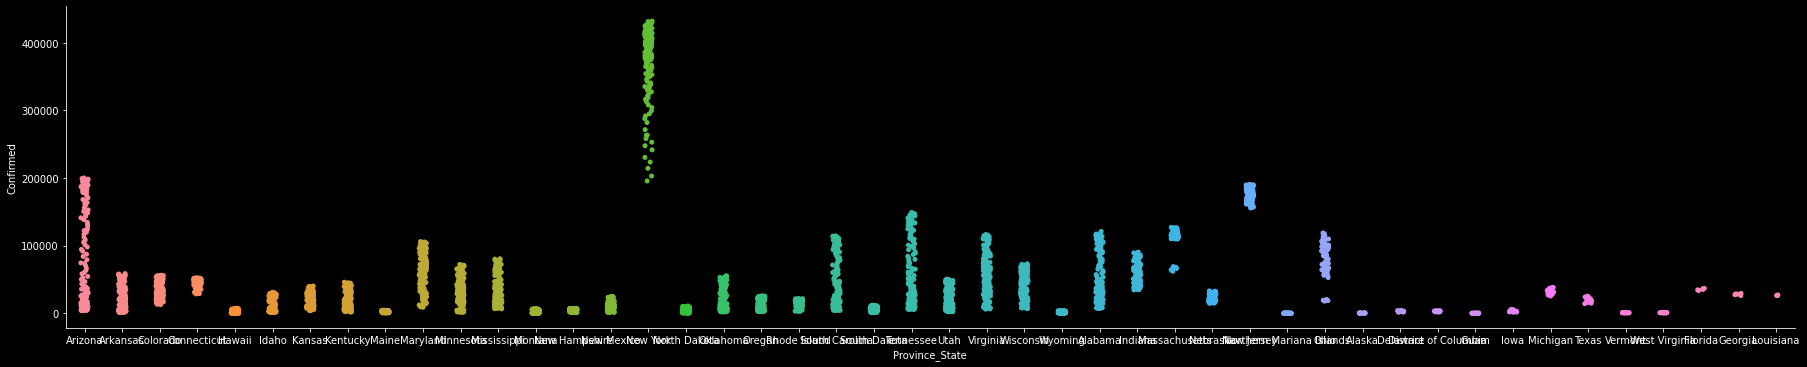

In [52]:
sns.catplot('Province_State','Confirmed',data = df.dropna(),aspect=5)

In [53]:
# state wise Confirmed, Deaths, Active and Recovered

In [54]:
px.bar(df,'Province_State','Confirmed',color='Deaths')

In [55]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Month,Day_of_Yr,Week_of_Yr
0,Alabama,US,2020-05-07 02:32:32,32.3182,-86.9023,8691,343,NaN,8348.0,1,185.352760,109516.0,1158.0,3.946611,84000001,USA,2335.645249,13.324128,May,128.0,19.0
1,Alaska,US,2020-05-07 02:32:32,61.3707,-152.4044,372,10,284.0,78.0,2,62.233479,23655.0,NaN,2.688172,84000002,USA,3957.346645,NaN,May,128.0,19.0
2,American Samoa,US,2020-05-07 02:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN,May,128.0,19.0
3,Arizona,US,2020-05-07 02:32:32,33.7298,-111.4312,9707,426,1693.0,7588.0,4,133.361415,91737.0,1430.0,4.388586,84000004,USA,1260.345745,14.731637,May,128.0,19.0
4,Arkansas,US,2020-05-07 02:32:32,34.9697,-92.3731,3611,87,2109.0,1415.0,5,139.473246,59003.0,453.0,2.409305,84000005,USA,2278.964260,12.545001,May,128.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,Virginia,US,2020-09-01 04:30:22,37.7693,-78.1700,120575,2580,15085.0,102910.0,51,1412.626461,1586551.0,NaN,2.139747,84000051,USA,18587.633628,NaN,September,245.0,36.0
9815,Washington,US,2020-09-01 04:30:22,47.4009,-121.4905,74635,1915,NaN,72720.0,53,980.118828,1461354.0,NaN,2.565820,84000053,USA,19190.735838,NaN,September,245.0,36.0
9816,West Virginia,US,2020-09-01 04:30:22,38.4912,-80.9545,10249,215,8017.0,2017.0,54,571.883891,436047.0,NaN,2.097766,84000054,USA,24330.984010,NaN,September,245.0,36.0
9817,Wisconsin,US,2020-09-01 04:30:22,44.2685,-89.6165,75603,1122,67234.0,7247.0,55,1298.477578,1253422.0,NaN,1.484068,84000055,USA,21527.457417,NaN,September,245.0,36.0


In [56]:
df.set_index('Province_State',inplace=True)

In [57]:
df

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Month,Day_of_Yr,Week_of_Yr
Province_State,,,,,,,,,,,,,,,,,,,,
Alabama,US,2020-05-07 02:32:32,32.3182,-86.9023,8691,343,NaN,8348.0,1,185.352760,109516.0,1158.0,3.946611,84000001,USA,2335.645249,13.324128,May,128.0,19.0
Alaska,US,2020-05-07 02:32:32,61.3707,-152.4044,372,10,284.0,78.0,2,62.233479,23655.0,NaN,2.688172,84000002,USA,3957.346645,NaN,May,128.0,19.0
American Samoa,US,2020-05-07 02:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN,May,128.0,19.0
Arizona,US,2020-05-07 02:32:32,33.7298,-111.4312,9707,426,1693.0,7588.0,4,133.361415,91737.0,1430.0,4.388586,84000004,USA,1260.345745,14.731637,May,128.0,19.0
Arkansas,US,2020-05-07 02:32:32,34.9697,-92.3731,3611,87,2109.0,1415.0,5,139.473246,59003.0,453.0,2.409305,84000005,USA,2278.964260,12.545001,May,128.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,US,2020-09-01 04:30:22,37.7693,-78.1700,120575,2580,15085.0,102910.0,51,1412.626461,1586551.0,NaN,2.139747,84000051,USA,18587.633628,NaN,September,245.0,36.0
Washington,US,2020-09-01 04:30:22,47.4009,-121.4905,74635,1915,NaN,72720.0,53,980.118828,1461354.0,NaN,2.565820,84000053,USA,19190.735838,NaN,September,245.0,36.0
West Virginia,US,2020-09-01 04:30:22,38.4912,-80.9545,10249,215,8017.0,2017.0,54,571.883891,436047.0,NaN,2.097766,84000054,USA,24330.984010,NaN,September,245.0,36.0


In [58]:
# Let's create a dataframe grouped by states 

In [59]:
df_grouped = df.groupby('Province_State').mean()

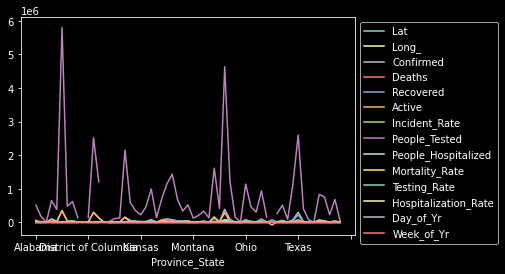

In [60]:
df_grouped.plot()
plt.legend(bbox_to_anchor = (1,1))

In [61]:
px.area(df_grouped.sort_values('Confirmed',ascending=False))

In [62]:
cols = ['Confirmed', 'Deaths', 'Active', 'Recovered']

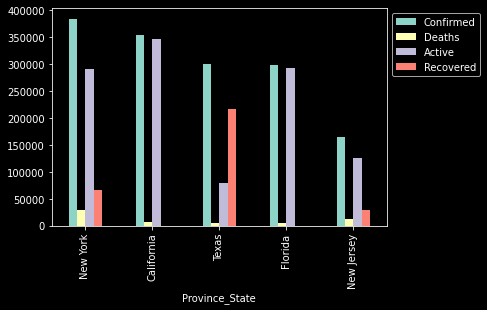

In [63]:
# top 10 most affected Province or States
df_grouped[cols].sort_values('Confirmed',ascending=False)[:5].plot(kind='bar')
plt.legend(bbox_to_anchor = (1,1))

In [64]:
df

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Month,Day_of_Yr,Week_of_Yr
Province_State,,,,,,,,,,,,,,,,,,,,
Alabama,US,2020-05-07 02:32:32,32.3182,-86.9023,8691,343,NaN,8348.0,1,185.352760,109516.0,1158.0,3.946611,84000001,USA,2335.645249,13.324128,May,128.0,19.0
Alaska,US,2020-05-07 02:32:32,61.3707,-152.4044,372,10,284.0,78.0,2,62.233479,23655.0,NaN,2.688172,84000002,USA,3957.346645,NaN,May,128.0,19.0
American Samoa,US,2020-05-07 02:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN,May,128.0,19.0
Arizona,US,2020-05-07 02:32:32,33.7298,-111.4312,9707,426,1693.0,7588.0,4,133.361415,91737.0,1430.0,4.388586,84000004,USA,1260.345745,14.731637,May,128.0,19.0
Arkansas,US,2020-05-07 02:32:32,34.9697,-92.3731,3611,87,2109.0,1415.0,5,139.473246,59003.0,453.0,2.409305,84000005,USA,2278.964260,12.545001,May,128.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,US,2020-09-01 04:30:22,37.7693,-78.1700,120575,2580,15085.0,102910.0,51,1412.626461,1586551.0,NaN,2.139747,84000051,USA,18587.633628,NaN,September,245.0,36.0
Washington,US,2020-09-01 04:30:22,47.4009,-121.4905,74635,1915,NaN,72720.0,53,980.118828,1461354.0,NaN,2.565820,84000053,USA,19190.735838,NaN,September,245.0,36.0
West Virginia,US,2020-09-01 04:30:22,38.4912,-80.9545,10249,215,8017.0,2017.0,54,571.883891,436047.0,NaN,2.097766,84000054,USA,24330.984010,NaN,September,245.0,36.0


In [65]:
# Longitude vs Cofirmed

(-150.0, -50.0)

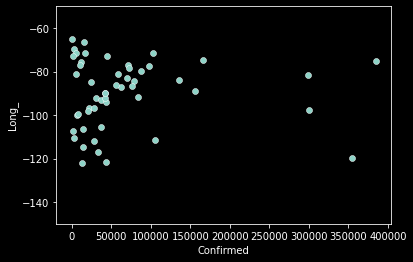

In [66]:
sns.scatterplot(df_grouped.Confirmed,df_grouped.Long_)
plt.ylim([-150,-50])

In [67]:
df_colored = df_grouped[df_grouped.Deaths > 0].dropna().sort_values('Confirmed',ascending=False).iloc[:,2:12].style.background_gradient(cmap='magma',)

In [68]:
df_colored

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Province_State,,,,,,,,,,
New York,384856.201183,29974.538462,65754.426036,291867.905325,2019.825769,4633378.065089,82167.656934,7.773080,23941.104060,22.144898
California,354380.514793,7491.905325,0.000000,346888.609467,897.058378,5807914.911243,4792.866667,2.739193,14701.137357,14.481314
Texas,300099.289941,5656.834320,216373.573964,78772.621302,1039.521911,2597412.911243,1495.266667,2.074503,9010.795945,7.626817
Florida,298528.834320,5677.650888,0.000000,293454.733728,1393.107783,2519818.733728,16332.379562,2.652853,11735.931514,12.126124
New Jersey,165465.224852,13082.917160,29279.110390,125887.047337,1862.887698,1613633.449704,18509.211009,7.711497,18167.067465,11.168498
Illinois,155734.266272,6262.195266,0.000000,149472.071006,1234.795774,2153191.946746,4499.200000,4.196206,17022.080032,14.305473
Georgia,136168.544379,3317.863905,0.000000,132850.680473,1284.298815,1205999.911243,11637.810219,3.113298,11370.700189,14.412431
Arizona,105016.798817,2538.627219,15465.065476,87201.698225,1442.743210,652281.313609,6566.182482,3.053587,8961.487493,10.179906
Massachusetts,102906.662722,7274.378698,95864.608696,43445.633136,1493.510262,1148993.976331,9819.481752,6.863332,16673.077770,10.041654


In [68]:
* The major cities like 

## Preprocessing the data

In [69]:
df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Month,Day_of_Yr,Week_of_Yr
Province_State,,,,,,,,,,,,,,,,,,,,
Alabama,US,2020-05-07 02:32:32,32.3182,-86.9023,8691,343,NaN,8348.0,1,185.352760,109516.0,1158.0,3.946611,84000001,USA,2335.645249,13.324128,May,128.0,19.0
Alaska,US,2020-05-07 02:32:32,61.3707,-152.4044,372,10,284.0,78.0,2,62.233479,23655.0,NaN,2.688172,84000002,USA,3957.346645,NaN,May,128.0,19.0
American Samoa,US,2020-05-07 02:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN,May,128.0,19.0
Arizona,US,2020-05-07 02:32:32,33.7298,-111.4312,9707,426,1693.0,7588.0,4,133.361415,91737.0,1430.0,4.388586,84000004,USA,1260.345745,14.731637,May,128.0,19.0
Arkansas,US,2020-05-07 02:32:32,34.9697,-92.3731,3611,87,2109.0,1415.0,5,139.473246,59003.0,453.0,2.409305,84000005,USA,2278.964260,12.545001,May,128.0,19.0


In [70]:
# Let's start with creating a copy of the original dataframe and preprocess it for building the model.

In [71]:
df_cleaned = df.copy()

In [72]:
df_cleaned.drop(['Country_Region','Last_Update','Lat','Long_','FIPS','UID','ISO3','Month'],1,inplace=True)

In [73]:
df_cleaned.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,Day_of_Yr,Week_of_Yr
Province_State,,,,,,,,,,,,
Alabama,8691,343,NaN,8348.0,185.352760,109516.0,1158.0,3.946611,2335.645249,13.324128,128.0,19.0
Alaska,372,10,284.0,78.0,62.233479,23655.0,NaN,2.688172,3957.346645,NaN,128.0,19.0
American Samoa,0,0,NaN,0.0,0.000000,83.0,NaN,NaN,149.170576,NaN,128.0,19.0
Arizona,9707,426,1693.0,7588.0,133.361415,91737.0,1430.0,4.388586,1260.345745,14.731637,128.0,19.0
Arkansas,3611,87,2109.0,1415.0,139.473246,59003.0,453.0,2.409305,2278.964260,12.545001,128.0,19.0


In [74]:
## removing the outliers

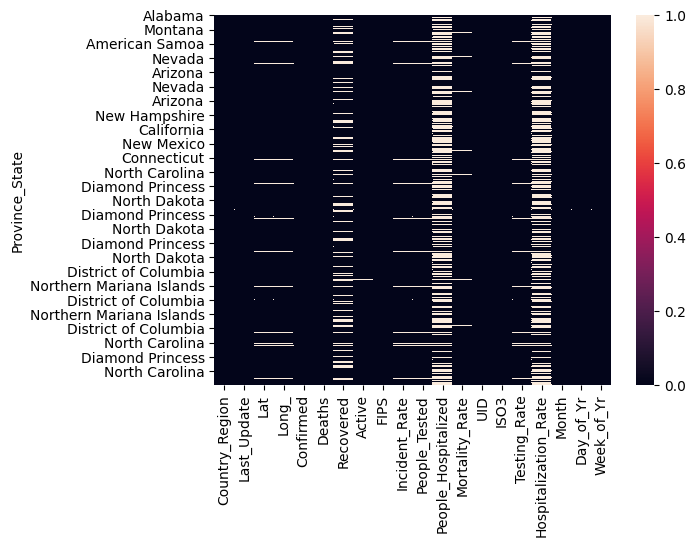

In [75]:
plt.style.use('default')
sns.heatmap(df.isna())

In [76]:
# There are a lot of missing values in this dataset.

In [77]:
# total missng values

In [78]:
df_cleaned.isna().sum()

Confirmed                  0
Deaths                     0
Recovered               2097
Active                    17
Incident_Rate            355
People_Tested            355
People_Hospitalized     4739
Mortality_Rate           186
Testing_Rate             355
Hospitalization_Rate    4739
Day_of_Yr                 16
Week_of_Yr                16
dtype: int64

In [79]:
# percentage of missing values
df_cleaned.isna().mean()* 100

Confirmed                0.000000
Deaths                   0.000000
Recovered               21.356554
Active                   0.173134
Incident_Rate            3.615439
People_Tested            3.615439
People_Hospitalized     48.263571
Mortality_Rate           1.894287
Testing_Rate             3.615439
Hospitalization_Rate    48.263571
Day_of_Yr                0.162949
Week_of_Yr               0.162949
dtype: float64

* 50 percent of the data is missing Peple Hospitalized and thus, Hosptialization rate.
* 21 perecent of recovery data is missing.
* Less than 4 percent of data is  missing from Incident Rate,Testing rate,People Tested.
* Less than 2 percent of data is missing from Mortality rate and active patients.

In [80]:
# addressing the missing values

In [81]:
# Let's remove the colmns People Hostitalized and Hostipalization rate as they have around 50 percent of missing values.
df_cleaned.drop(['People_Hospitalized','Hospitalization_Rate'],1,inplace=True)

In [82]:
# Also drop the samples where the region value is Recovered
df_cleaned.drop('Recovered',inplace=True)

In [83]:
# Now, lets impute the missing values less than 5 percent.

In [84]:
to_impute_cols = []
for col in df_cleaned:
    if  (df[col].isna().mean() < 0.05) and (df[col].isna().mean() != 0):
        to_impute_cols.append(col)

In [85]:
to_impute_cols

['Active',
 'Incident_Rate',
 'People_Tested',
 'Mortality_Rate',
 'Testing_Rate',
 'Day_of_Yr',
 'Week_of_Yr']

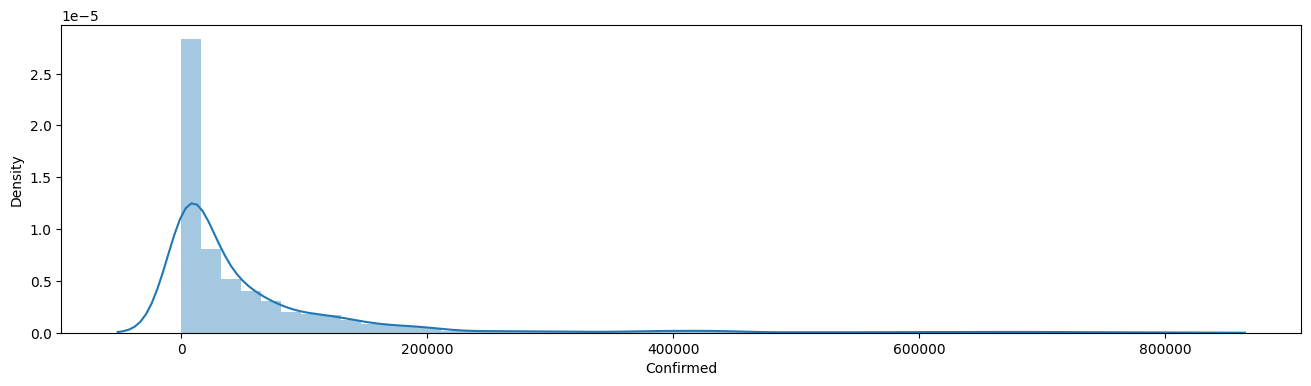

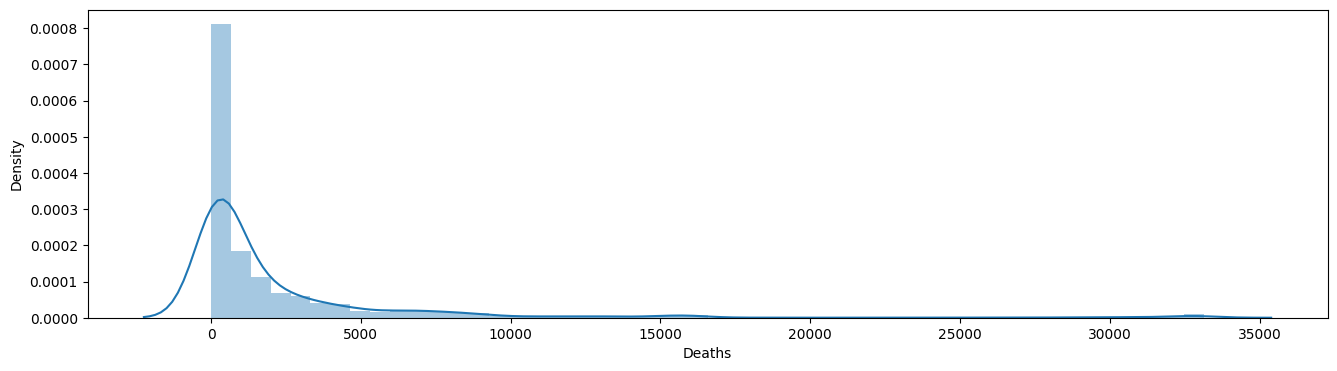

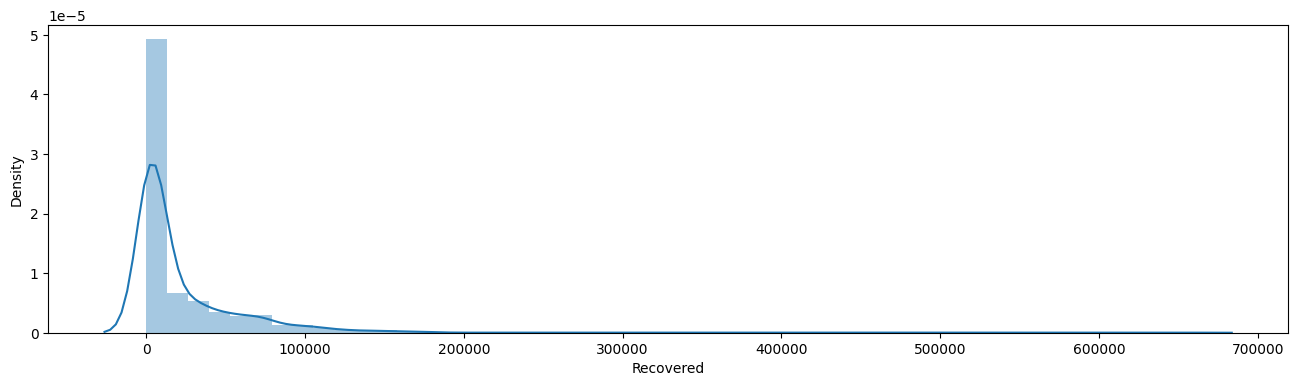

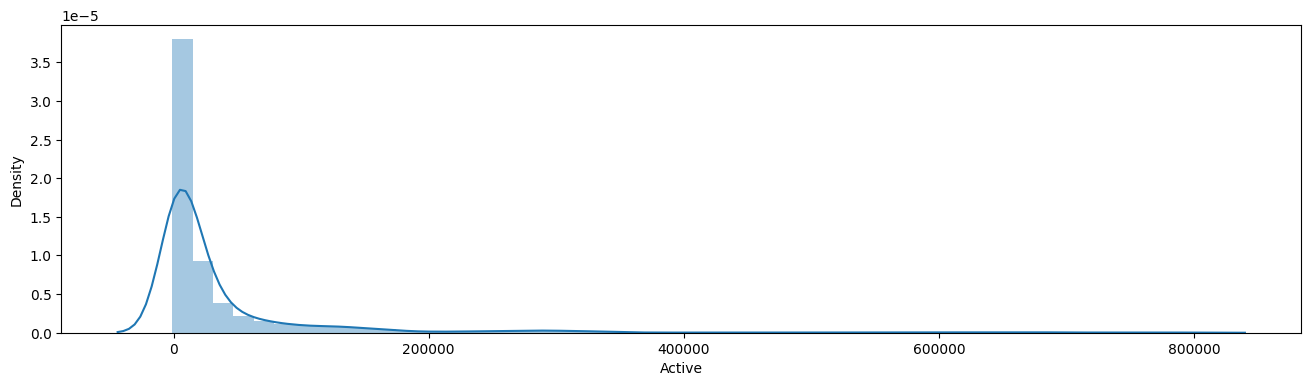

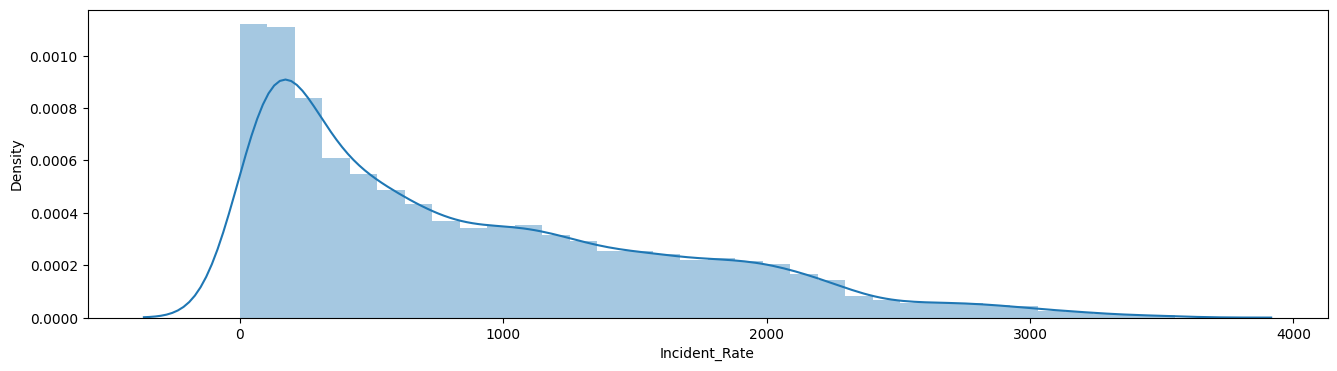

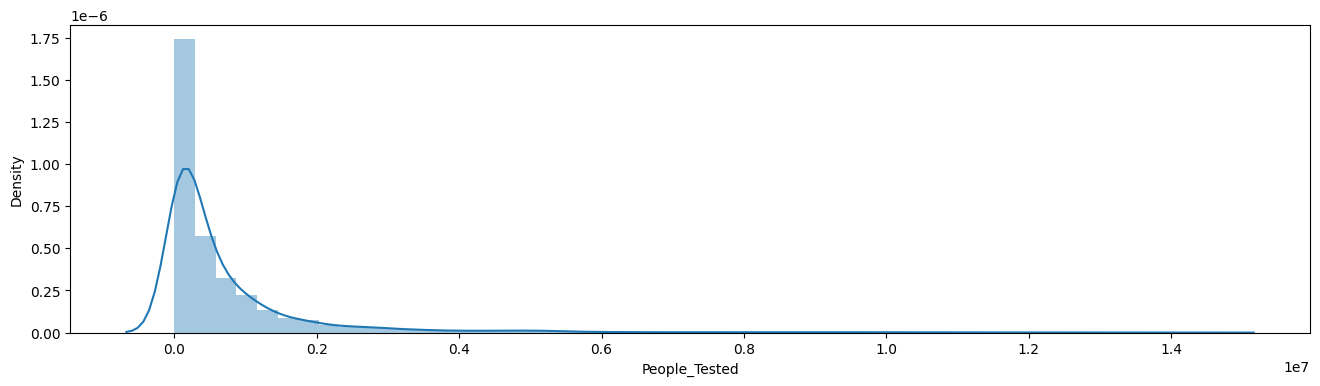

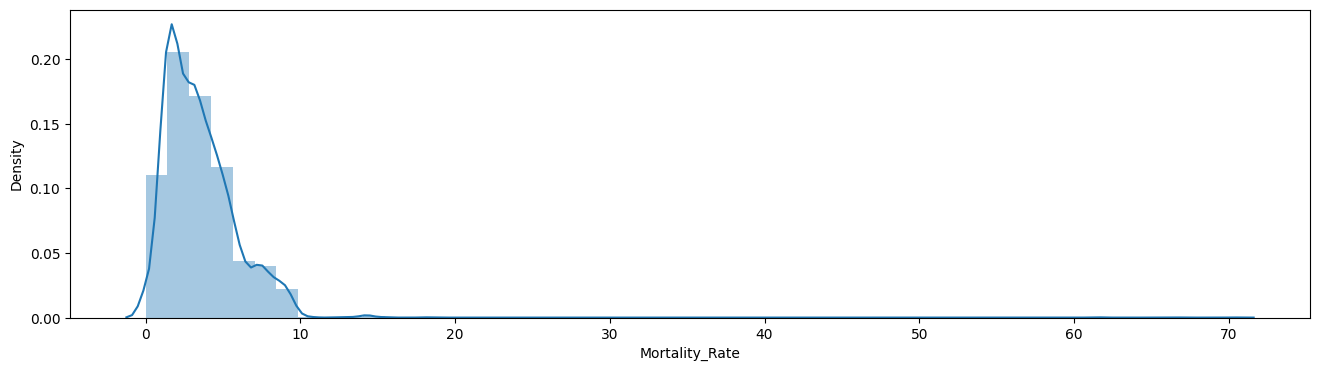

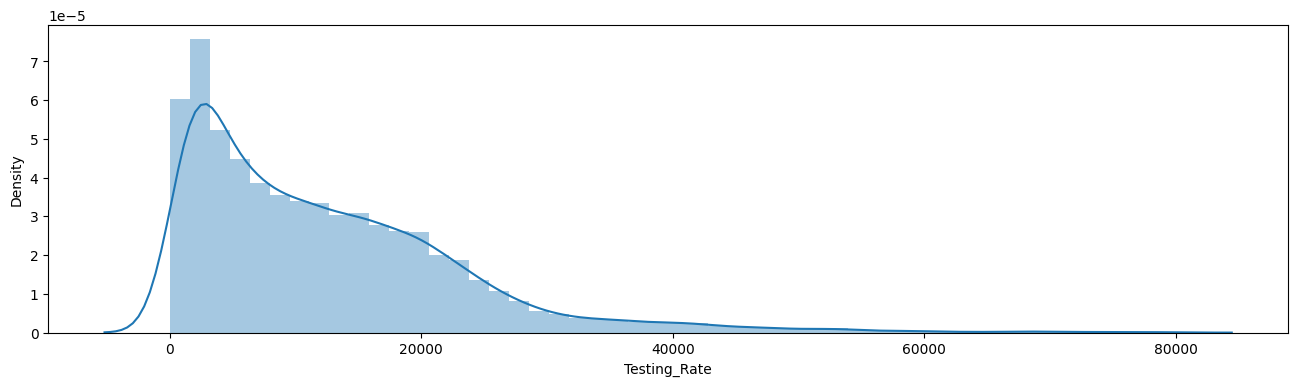

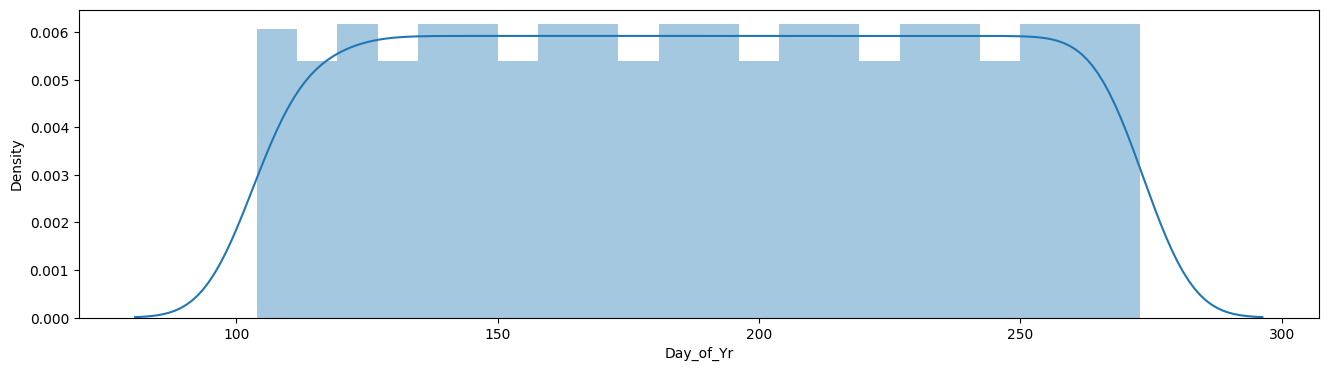

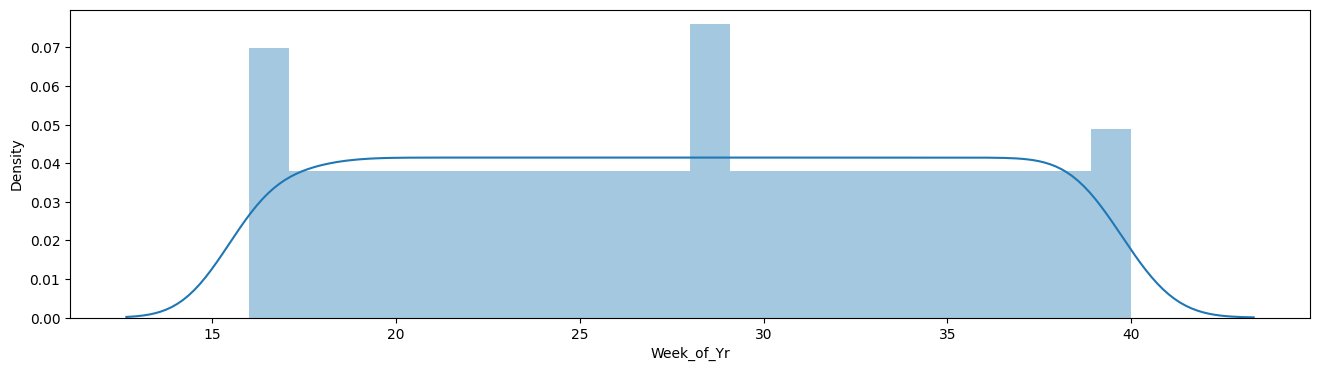

In [86]:
# distribution of these features
for col in df_cleaned.columns:
    plt.figure(figsize=(16,4))
    sns.distplot(df_cleaned[col])

In [87]:
from feature_engine.missing_data_imputers import MeanMedianImputer,RandomSampleImputer,EndTailImputer

In [88]:
from itertools import cycle
imputers = cycle([MeanMedianImputer(variables=to_impute_cols),RandomSampleImputer(variables=to_impute_cols),EndTailImputer(variables=to_impute_cols)])
imputer_names = cycle(['Median Imputer','Random Sample Imputer','End Tail Imputer'])

In [89]:
print(next(imputers))
print(next(imputer_names))

MeanMedianImputer(imputation_method='median',
                  variables=['Active', 'Incident_Rate', 'People_Tested',
                             'Mortality_Rate', 'Testing_Rate', 'Day_of_Yr',
                             'Week_of_Yr'])
Median Imputer


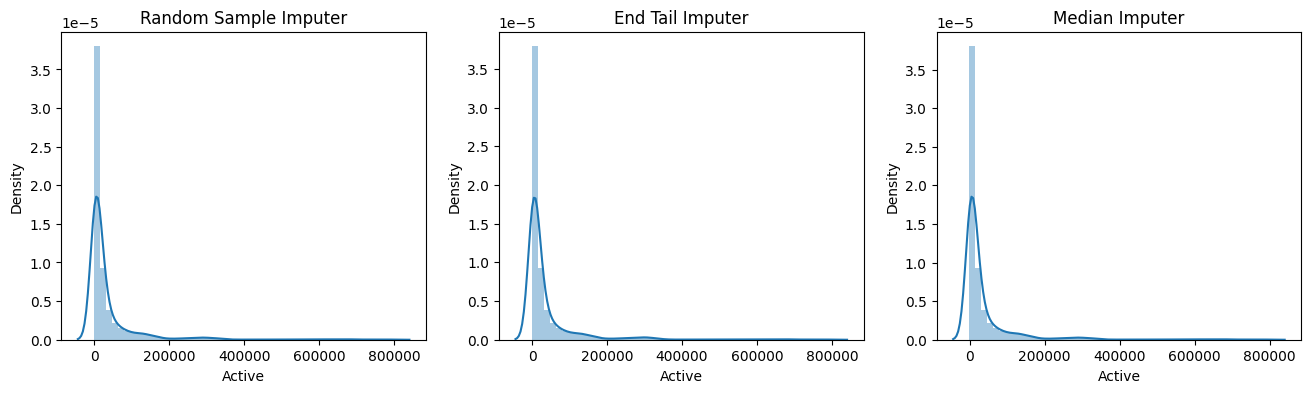

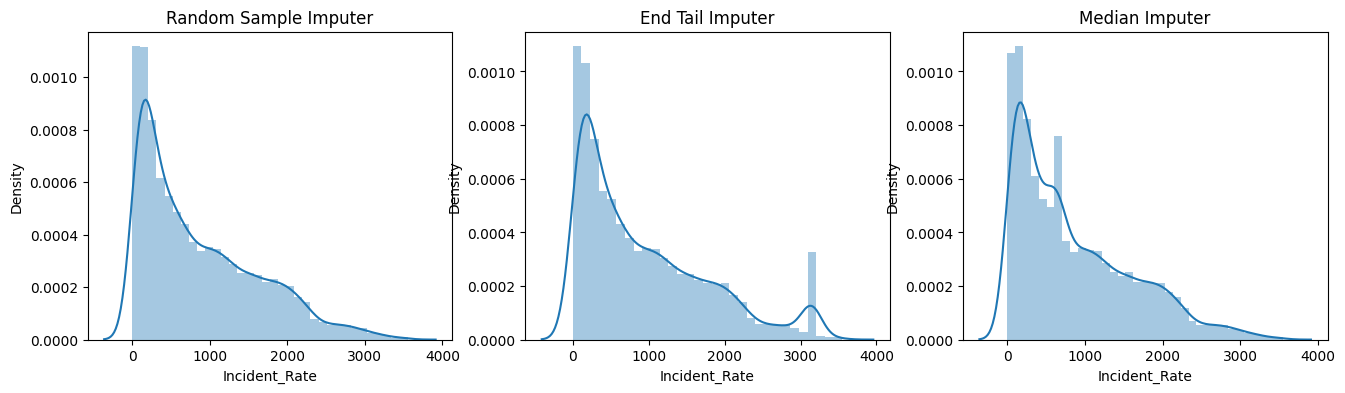

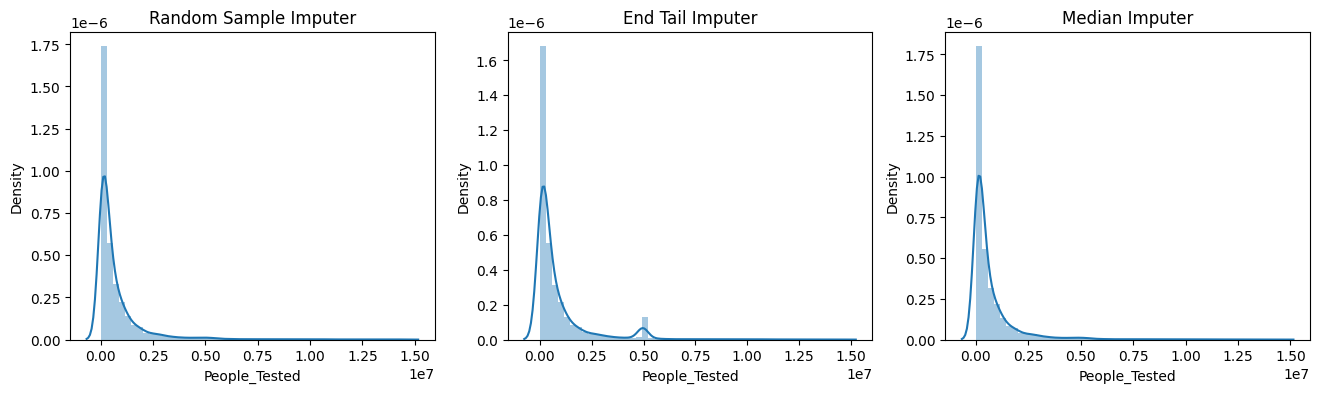

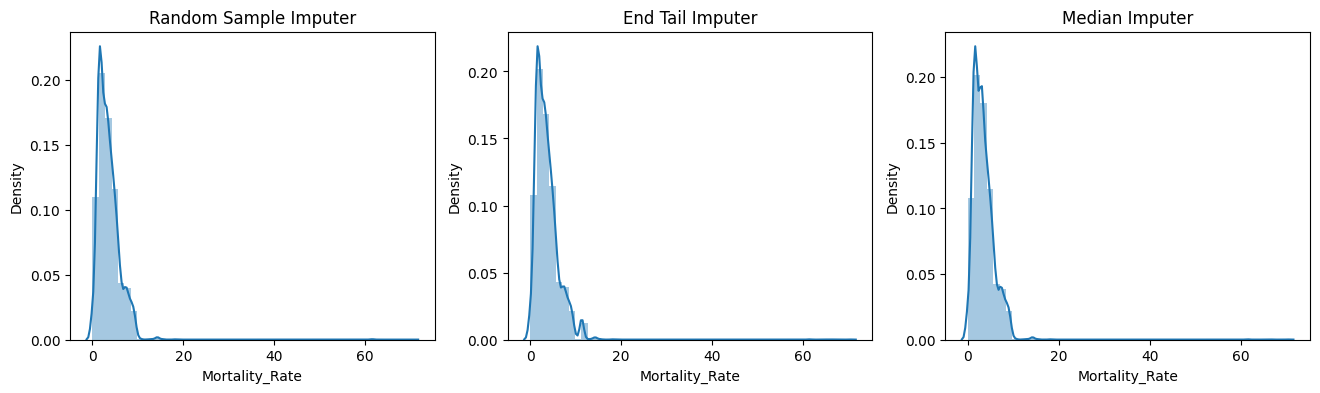

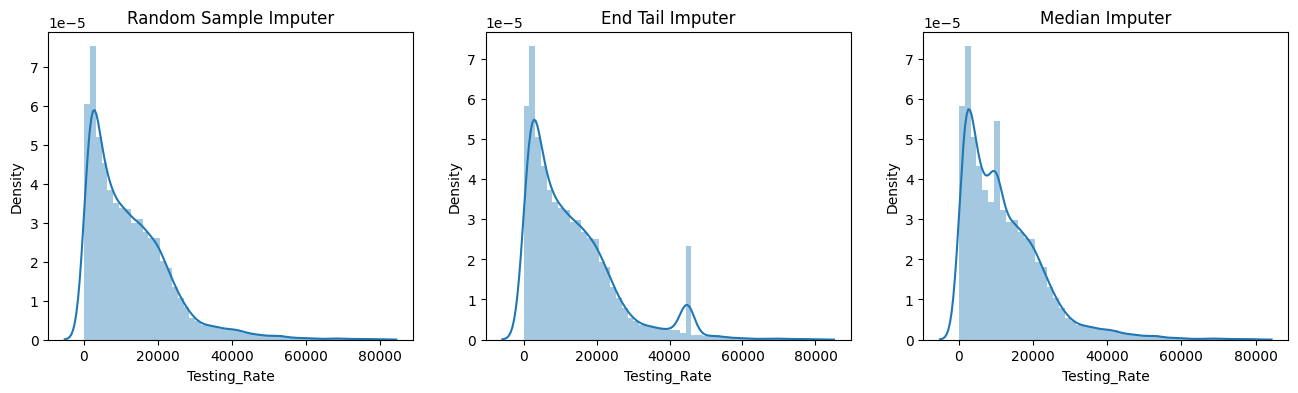

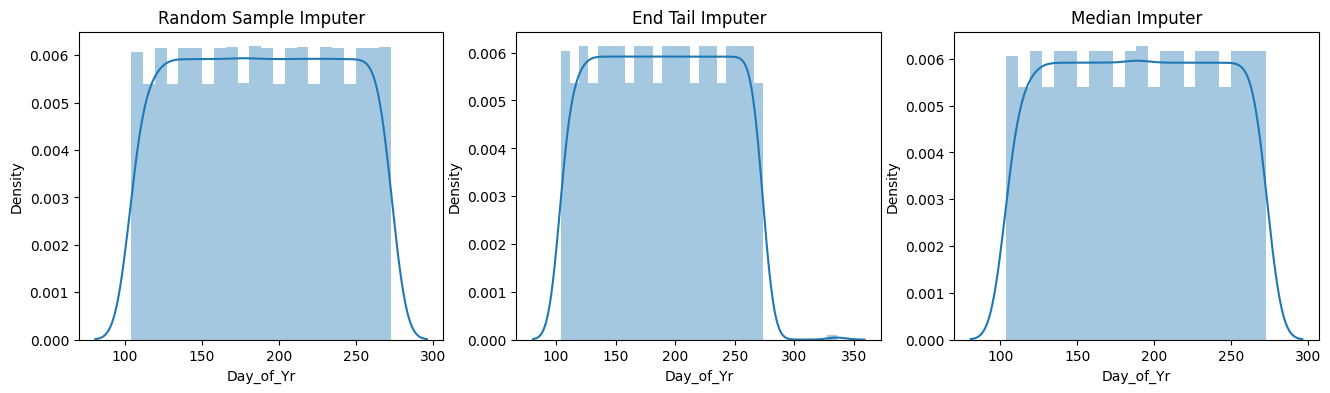

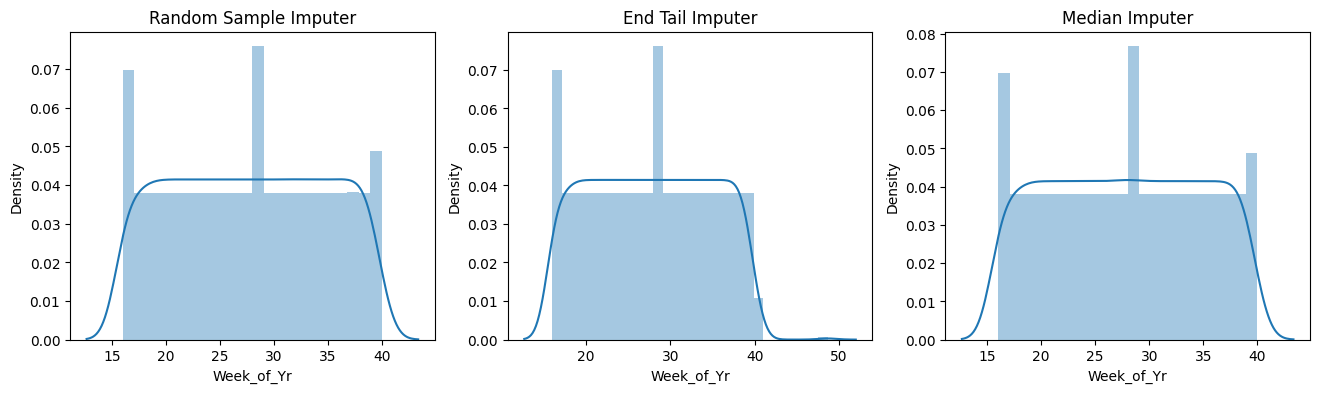

In [90]:
for col in to_impute_cols:
    
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
    
    for n in range (3):
        sns.distplot(next(imputers).fit_transform(df_cleaned)[col],ax=ax[n])
        ax[n].title.set_text(next(imputer_names))

* From the above plots we can make out that the Random Sample imputation works best, so let's finalize it as our imputation technique for the missing values less than 5 percent.

In [91]:
df_cleaned = RandomSampleImputer(variables=to_impute_cols).fit_transform(df_cleaned)

In [92]:
# sanity check
df_cleaned.isna().sum()

Confirmed            0
Deaths               0
Recovered         2097
Active               0
Incident_Rate        0
People_Tested        0
Mortality_Rate       0
Testing_Rate         0
Day_of_Yr            0
Week_of_Yr           0
dtype: int64

In [93]:
# geat, now there's only recovered feature remaining.

In [94]:
# We there recovered values are NaN and Confirmed is 0, impter recover as 0

In [95]:
df_cleaned = df_cleaned.reset_index().drop('Province_State',1)

In [96]:
df_cleaned

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Day_of_Yr,Week_of_Yr
0,8691,343,NaN,8348.0,185.352760,109516.0,3.946611,2335.645249,128.0,19.0
1,372,10,284.0,78.0,62.233479,23655.0,2.688172,3957.346645,128.0,19.0
2,0,0,NaN,0.0,0.000000,83.0,3.935508,149.170576,128.0,19.0
3,9707,426,1693.0,7588.0,133.361415,91737.0,4.388586,1260.345745,128.0,19.0
4,3611,87,2109.0,1415.0,139.473246,59003.0,2.409305,2278.964260,128.0,19.0
...,...,...,...,...,...,...,...,...,...,...
9797,120575,2580,15085.0,102910.0,1412.626461,1586551.0,2.139747,18587.633628,245.0,36.0
9798,74635,1915,NaN,72720.0,980.118828,1461354.0,2.565820,19190.735838,245.0,36.0
9799,10249,215,8017.0,2017.0,571.883891,436047.0,2.097766,24330.984010,245.0,36.0
9800,75603,1122,67234.0,7247.0,1298.477578,1253422.0,1.484068,21527.457417,245.0,36.0


In [97]:
df_cleaned[((df_cleaned.Recovered.isna()) & (df_cleaned.Active < 200))].sort_values('Active')

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Day_of_Yr,Week_of_Yr
2,0,0,NaN,0.0,0.000000,83.0,3.935508,149.170576,128.0,19.0
8818,0,0,NaN,0.0,0.000000,83.0,4.922405,149.170576,130.0,19.0
2554,0,0,NaN,0.0,0.000000,816.0,5.650050,1466.544455,193.0,28.0
7774,0,0,NaN,0.0,0.000000,1037.0,2.562509,1863.733578,206.0,30.0
2612,0,0,NaN,0.0,0.000000,174.0,1.794088,312.719038,149.0,22.0
...,...,...,...,...,...,...,...,...,...,...
4827,103,3,NaN,100.0,46.182987,99276.0,2.912621,23549.493192,210.0,31.0
4885,103,3,NaN,100.0,440.631587,506398.0,2.912621,26543.195722,151.0,22.0
4943,103,3,NaN,100.0,1567.548739,163719.0,2.912621,23413.468466,175.0,26.0
4189,103,3,NaN,100.0,975.544173,162241.0,2.912621,19247.206138,185.0,27.0


In [98]:
# Imput the missing values in recovered with zero where the active feature is less than 200.

In [99]:
df_cleaned.Recovered = df_cleaned.Recovered.mask((df_cleaned.Active < 200) & (df_cleaned.Recovered.isna()),0)

In [100]:
df_cleaned.isna().sum()

Confirmed            0
Deaths               0
Recovered         1651
Active               0
Incident_Rate        0
People_Tested        0
Mortality_Rate       0
Testing_Rate         0
Day_of_Yr            0
Week_of_Yr           0
dtype: int64

In [101]:
df_cleaned.isna().mean()

Confirmed         0.000000
Deaths            0.000000
Recovered         0.168435
Active            0.000000
Incident_Rate     0.000000
People_Tested     0.000000
Mortality_Rate    0.000000
Testing_Rate      0.000000
Day_of_Yr         0.000000
Week_of_Yr        0.000000
dtype: float64

In [102]:
df_cleaned

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Day_of_Yr,Week_of_Yr
0,8691,343,NaN,8348.0,185.352760,109516.0,3.946611,2335.645249,128.0,19.0
1,372,10,284.0,78.0,62.233479,23655.0,2.688172,3957.346645,128.0,19.0
2,0,0,0.0,0.0,0.000000,83.0,3.935508,149.170576,128.0,19.0
3,9707,426,1693.0,7588.0,133.361415,91737.0,4.388586,1260.345745,128.0,19.0
4,3611,87,2109.0,1415.0,139.473246,59003.0,2.409305,2278.964260,128.0,19.0
...,...,...,...,...,...,...,...,...,...,...
9797,120575,2580,15085.0,102910.0,1412.626461,1586551.0,2.139747,18587.633628,245.0,36.0
9798,74635,1915,NaN,72720.0,980.118828,1461354.0,2.565820,19190.735838,245.0,36.0
9799,10249,215,8017.0,2017.0,571.883891,436047.0,2.097766,24330.984010,245.0,36.0
9800,75603,1122,67234.0,7247.0,1298.477578,1253422.0,1.484068,21527.457417,245.0,36.0


In [103]:
df_cleaned[((df_cleaned.Recovered.isna()) & (df_cleaned.Deaths == df_cleaned.Confirmed))]

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Day_of_Yr,Week_of_Yr
1162,0,0,NaN,574.0,0.0,3.0,1.497242,5.391708,246.0,36.0
1800,0,0,NaN,5812.0,0.0,3.0,1.958060,5.391708,118.0,18.0
2206,0,0,NaN,4355.0,0.0,3.0,5.135491,5.391708,115.0,17.0
4584,0,0,NaN,13970.0,0.0,3.0,2.764977,5.391708,199.0,25.0
5164,0,0,NaN,2537.0,0.0,3.0,5.494954,5.391708,211.0,32.0
5396,0,0,NaN,14620.0,0.0,3.0,8.041500,5.391708,166.0,16.0
5976,0,0,NaN,128890.0,0.0,3.0,3.110984,5.391708,121.0,18.0
6266,0,0,NaN,568.0,0.0,3.0,5.128683,5.391708,111.0,32.0
7020,0,0,NaN,12340.0,0.0,3.0,3.128412,5.391708,119.0,18.0
7426,0,0,NaN,716.0,0.0,3.0,1.680672,5.391708,112.0,17.0


In [104]:
# How could you recover if you are not a confirmed corona patitent.

In [105]:
df_cleaned.Recovered = df_cleaned.Recovered.mask(((df_cleaned.Recovered.isna()) & (df_cleaned.Deaths == df_cleaned.Confirmed)),0)

In [106]:
df_cleaned.isna().mean()

Confirmed         0.000000
Deaths            0.000000
Recovered         0.166701
Active            0.000000
Incident_Rate     0.000000
People_Tested     0.000000
Mortality_Rate    0.000000
Testing_Rate      0.000000
Day_of_Yr         0.000000
Week_of_Yr        0.000000
dtype: float64

* LEt's impute the rest of the missing values in the Recovered Feature

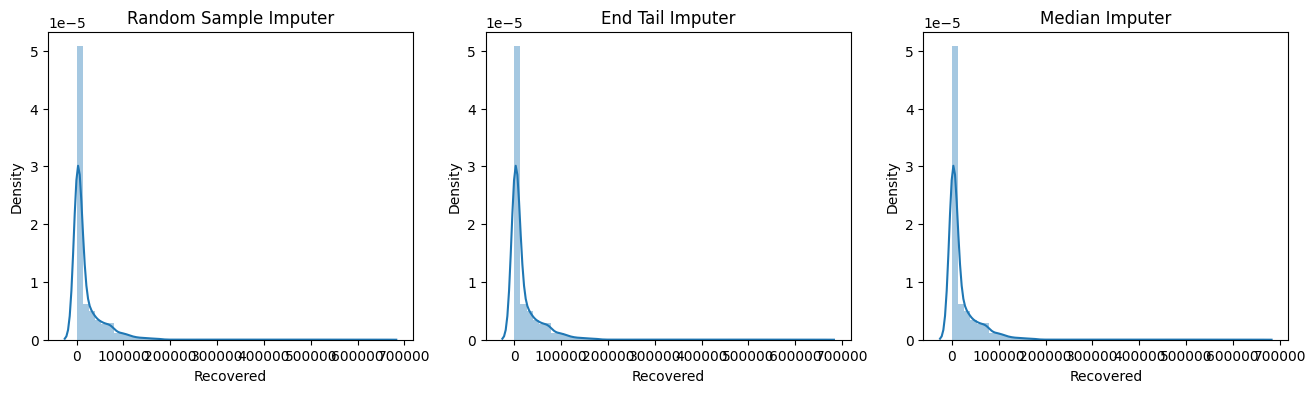

In [107]:
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
    
    for n in range (3):
        sns.distplot(next(imputers).fit_transform(df_cleaned)['Recovered'],ax=ax[n])
        ax[n].title.set_text(next(imputer_names))

In [108]:
# Theres not much of Difference in any of the imputatuion techniques , let's do median imputation

In [109]:
df_cleaned = MeanMedianImputer(variables=['Recovered']).fit_transform(df_cleaned)

In [110]:
# sanity check
df_cleaned.isna().sum()

Confirmed         0
Deaths            0
Recovered         0
Active            0
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
Testing_Rate      0
Day_of_Yr         0
Week_of_Yr        0
dtype: int64

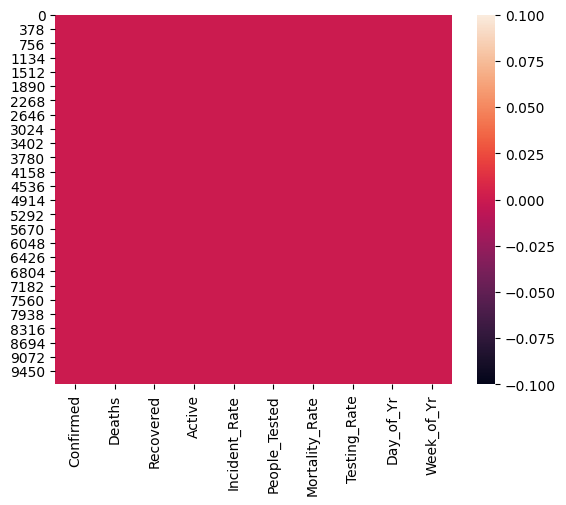

In [111]:
sns.heatmap(df_cleaned.isna())

* A clean slate, imputation successfull.

## Removing the Outiers

In [112]:
df_cleaned.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Day_of_Yr,Week_of_Yr
0,8691,343,5366.0,8348.0,185.352760,109516.0,3.946611,2335.645249,128.0,19.0
1,372,10,284.0,78.0,62.233479,23655.0,2.688172,3957.346645,128.0,19.0
2,0,0,0.0,0.0,0.000000,83.0,3.935508,149.170576,128.0,19.0
3,9707,426,1693.0,7588.0,133.361415,91737.0,4.388586,1260.345745,128.0,19.0
4,3611,87,2109.0,1415.0,139.473246,59003.0,2.409305,2278.964260,128.0,19.0


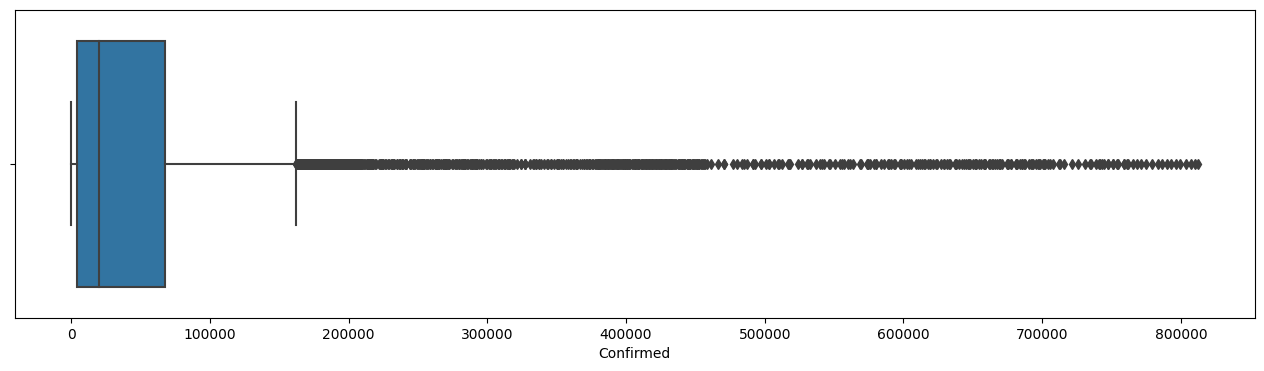

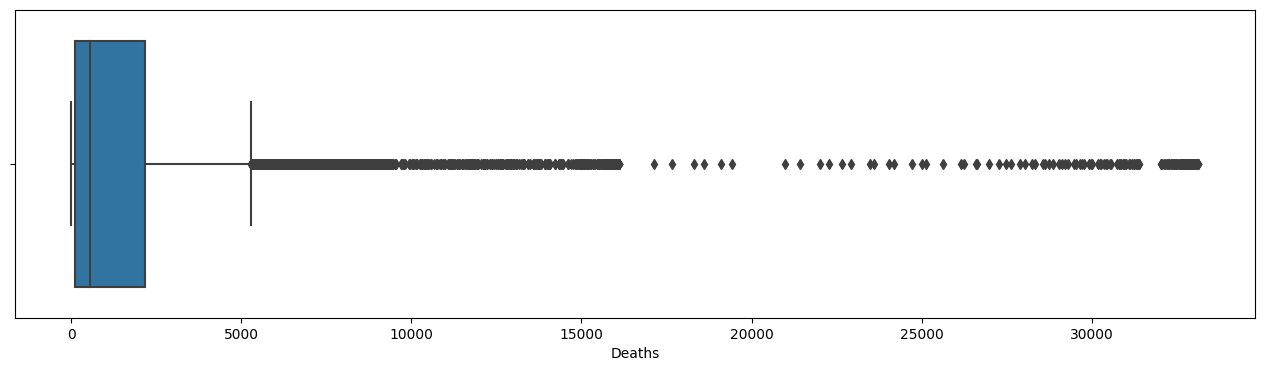

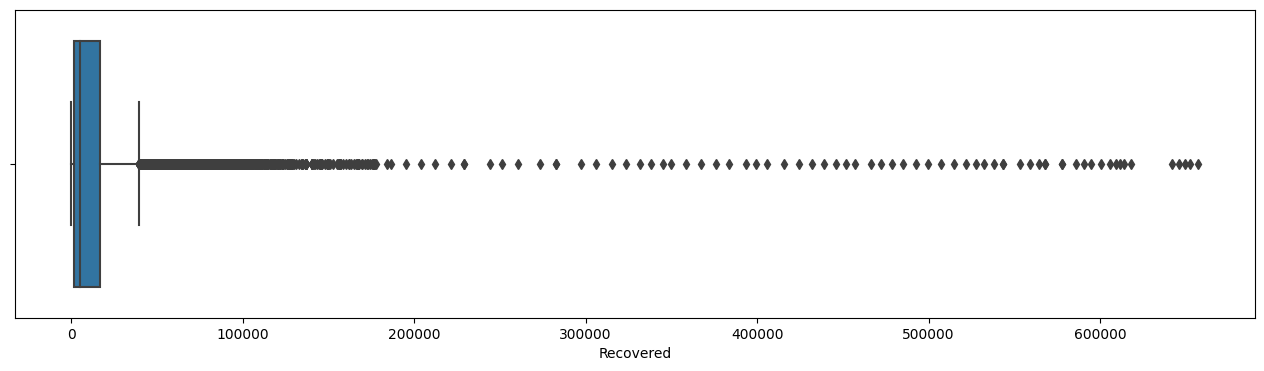

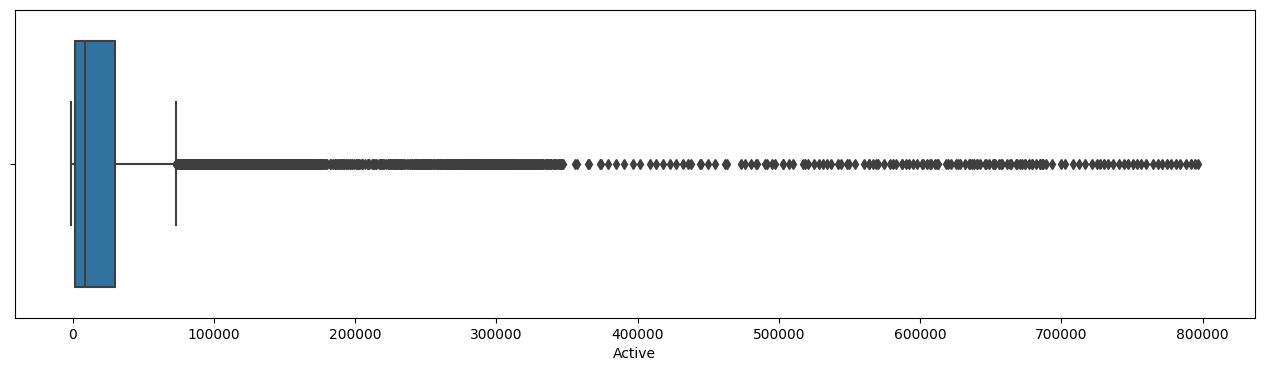

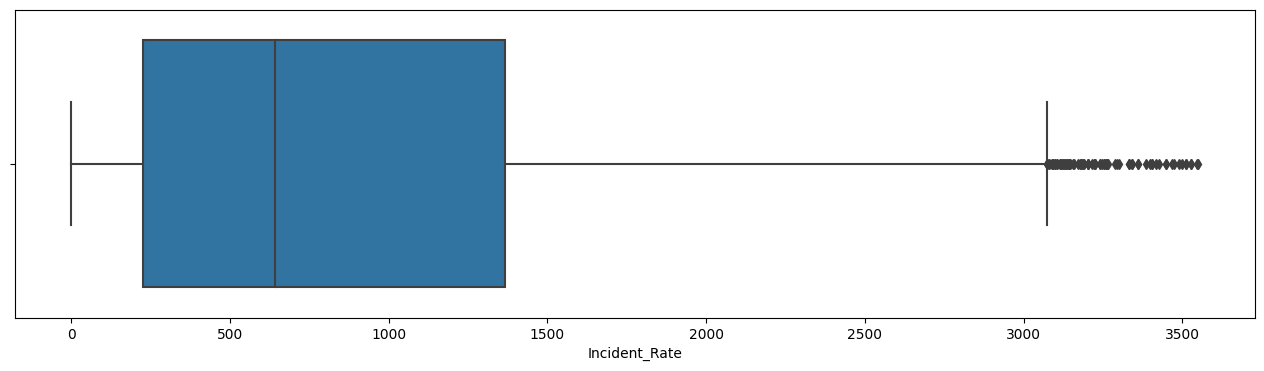

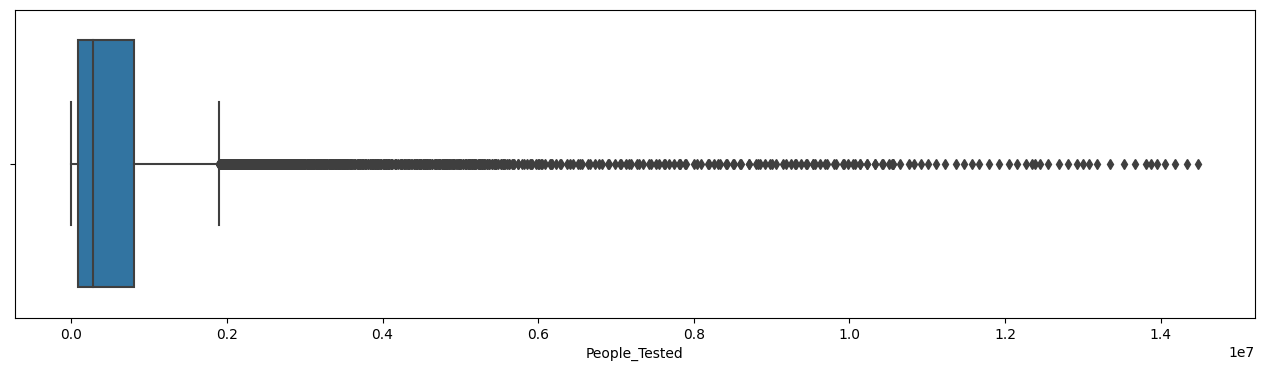

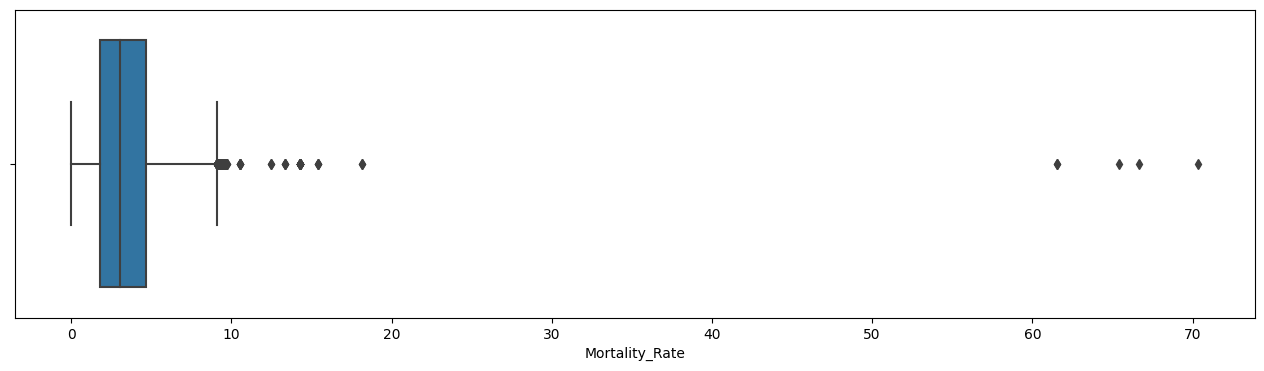

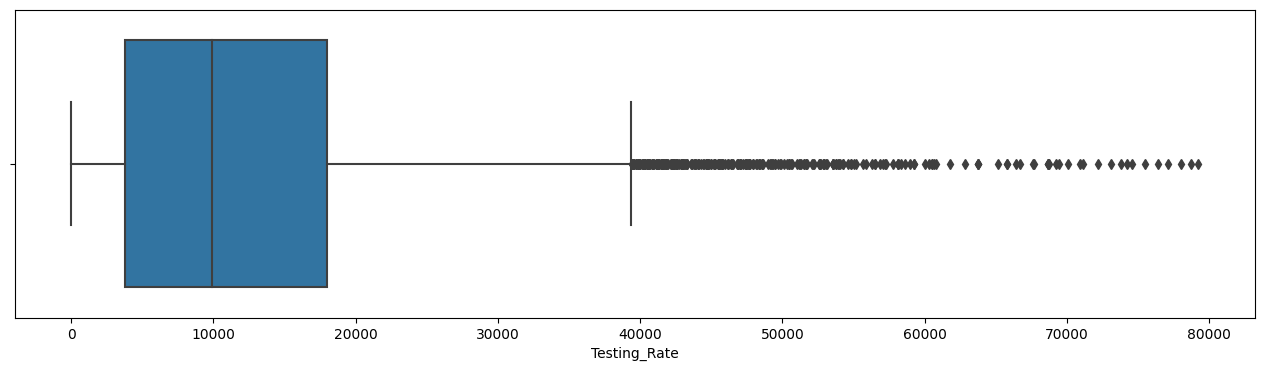

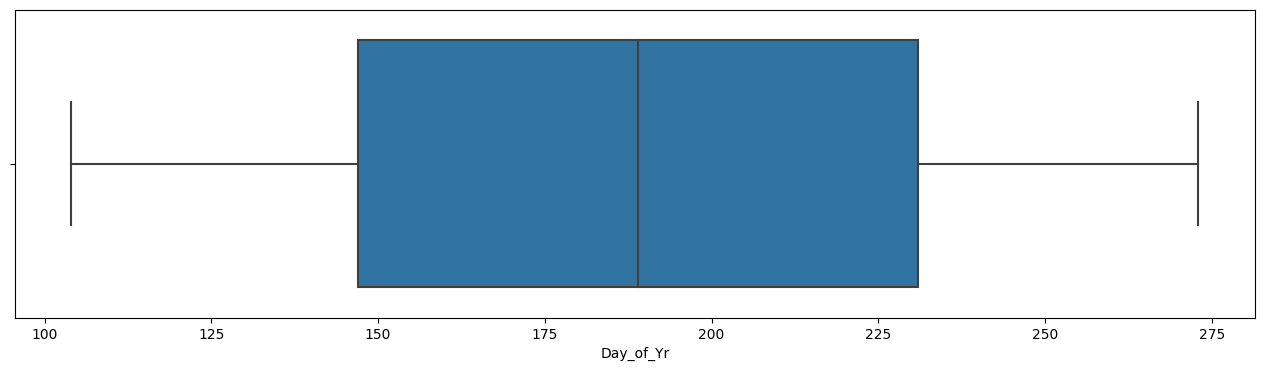

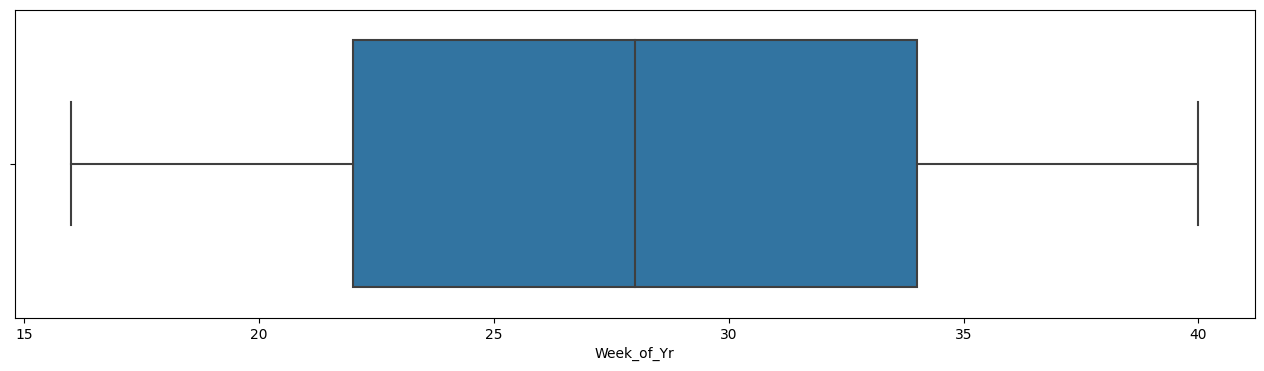

In [113]:
for col in df_cleaned.columns:
    fig_this_size(16,4)
    sns.boxplot(df_cleaned[col])

* Almost all of the features are very highly positively skewed

In [114]:
# Let's address some of these extreme outliers using the z score method.

In [115]:
len(df_cleaned)

9802

In [116]:

z_scores = stats.zscore(df_cleaned)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df_cleaned[filtered_entries]


In [117]:
len(df_cleaned)

9161

In [118]:
# number of total outliers removed:
9802 - 9157

645

* We removed 645 values in total.

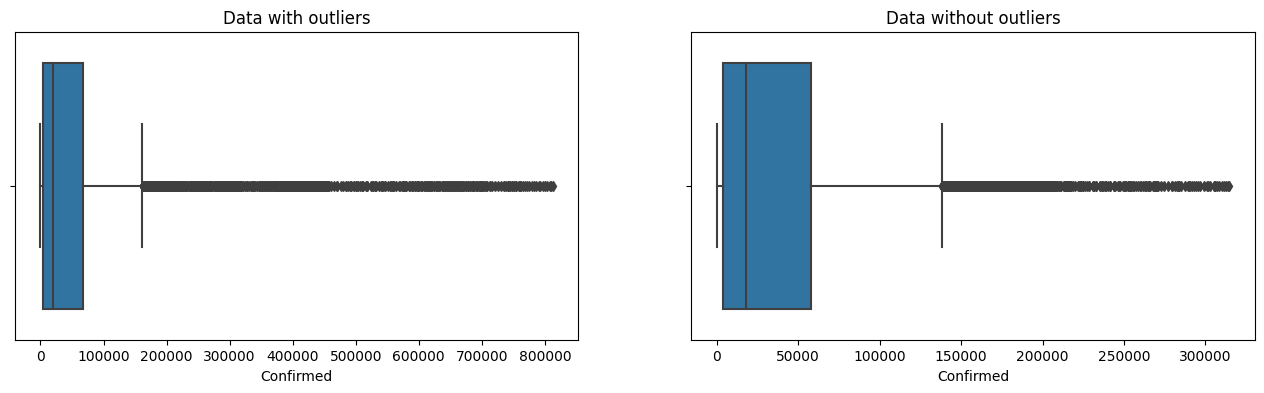

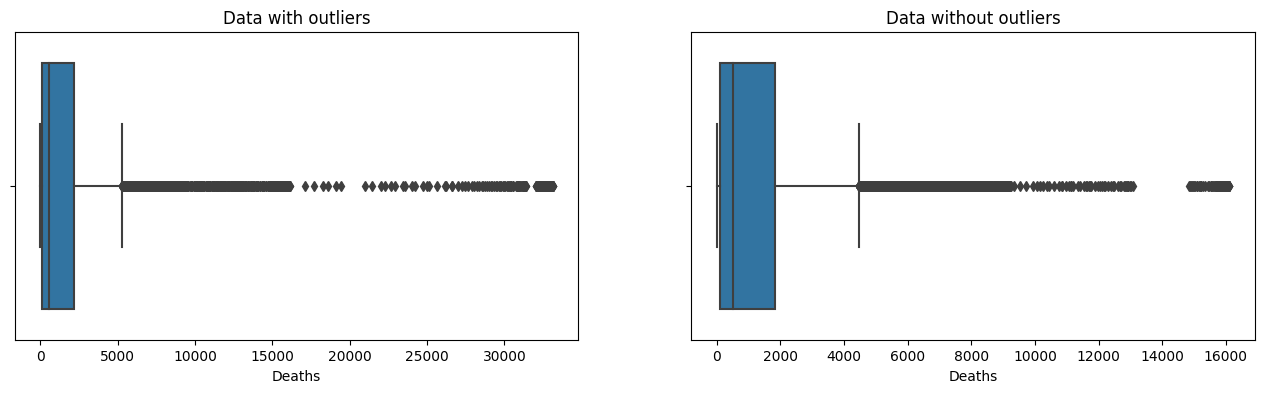

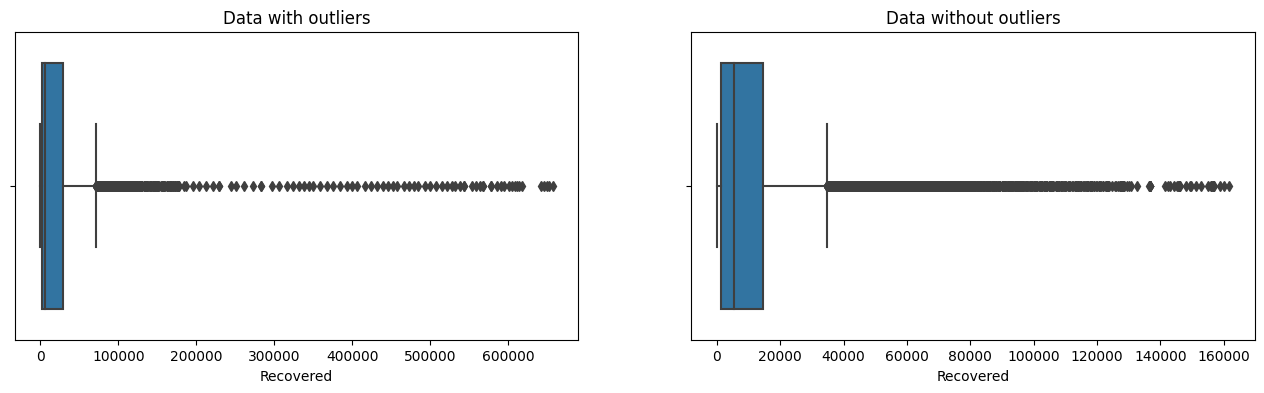

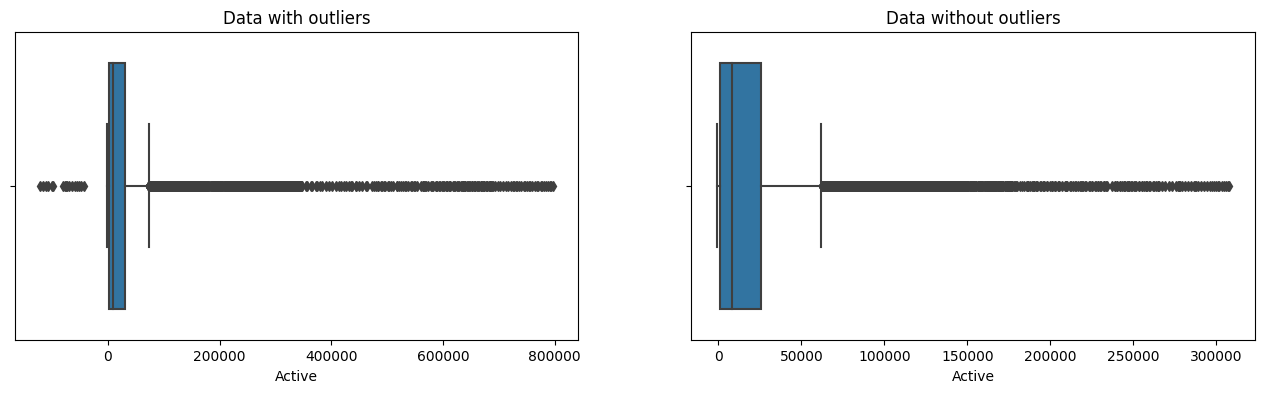

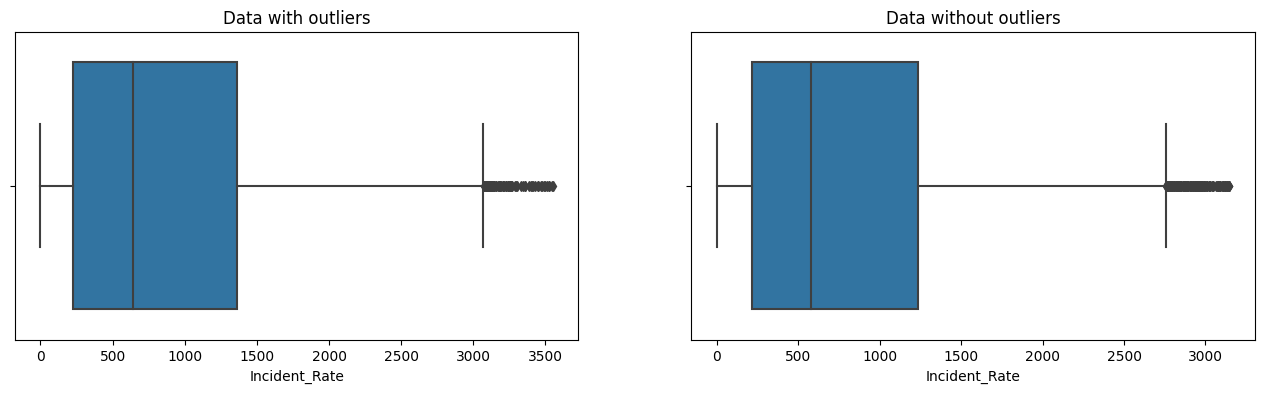

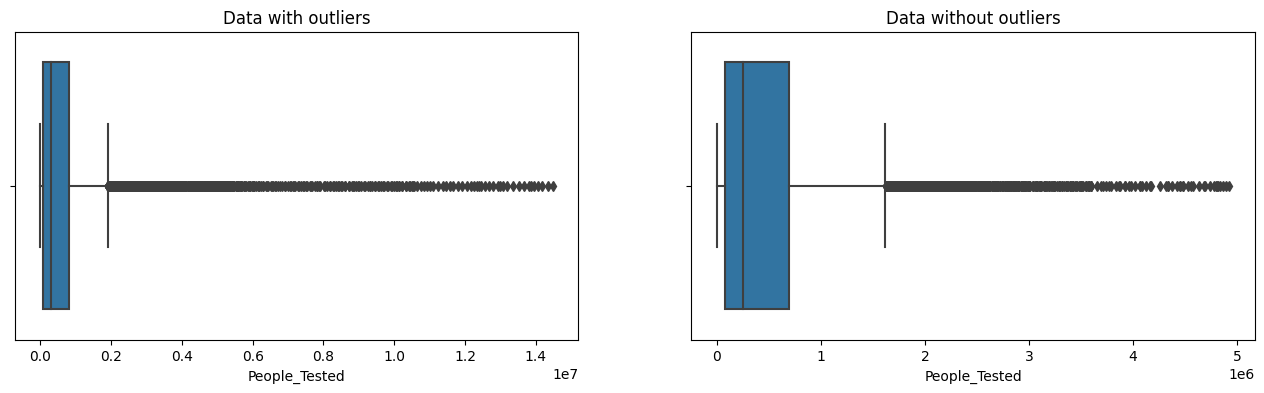

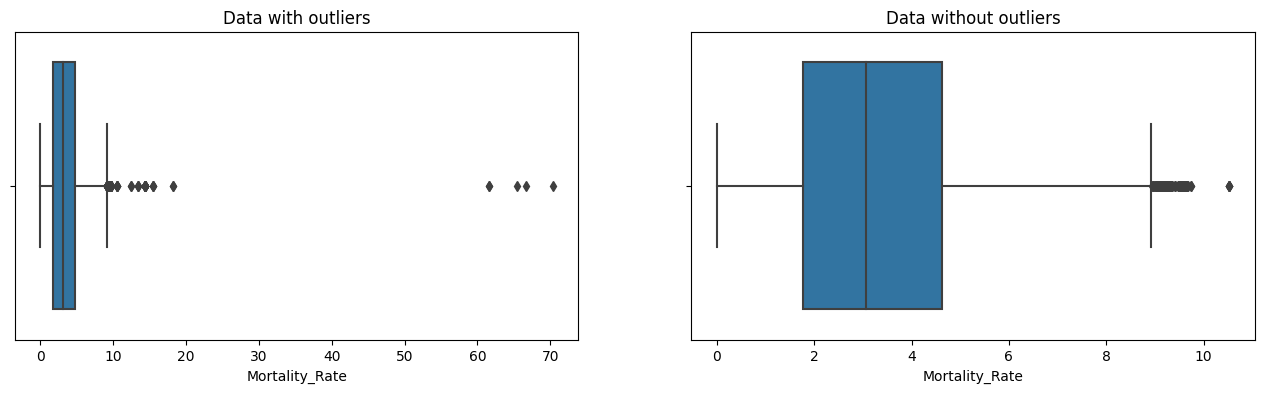

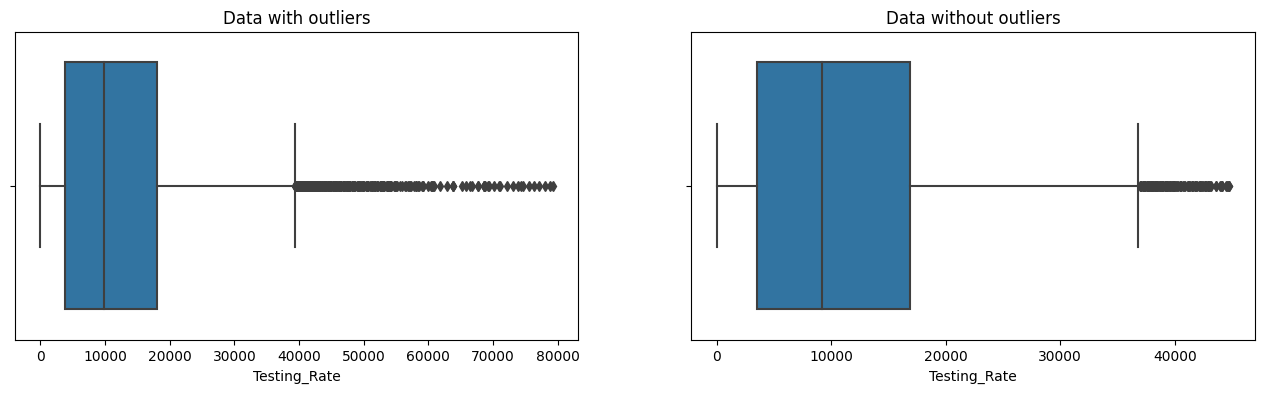

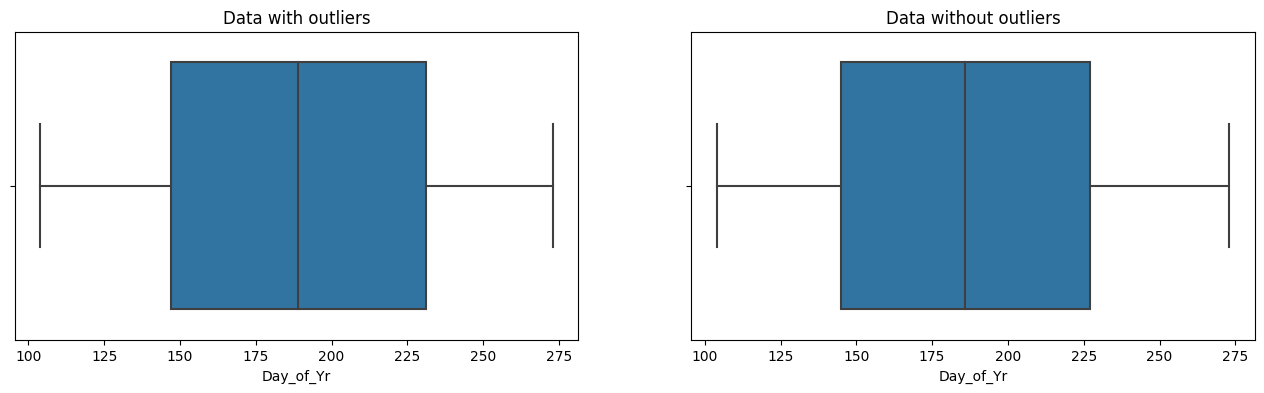

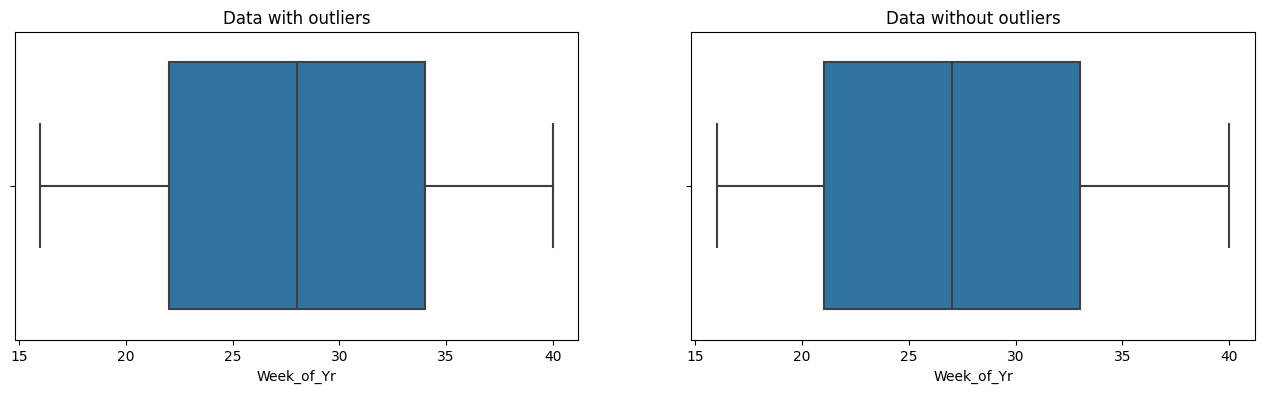

In [119]:
# before and after removing the outliers
for col in df_cleaned:
    fig = fig_this_size(16,4)
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('Data with outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[col])
    plt.title('Data without outliers')

## Skew Transformation.

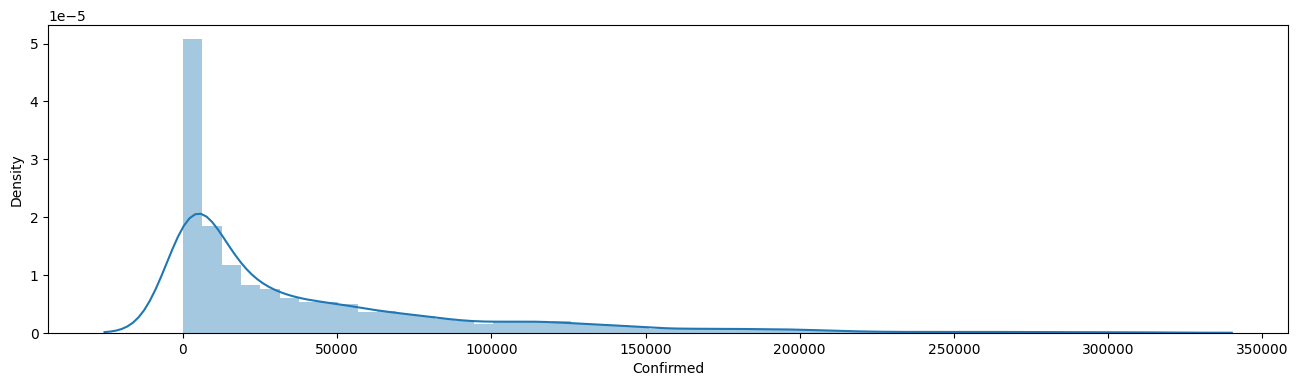

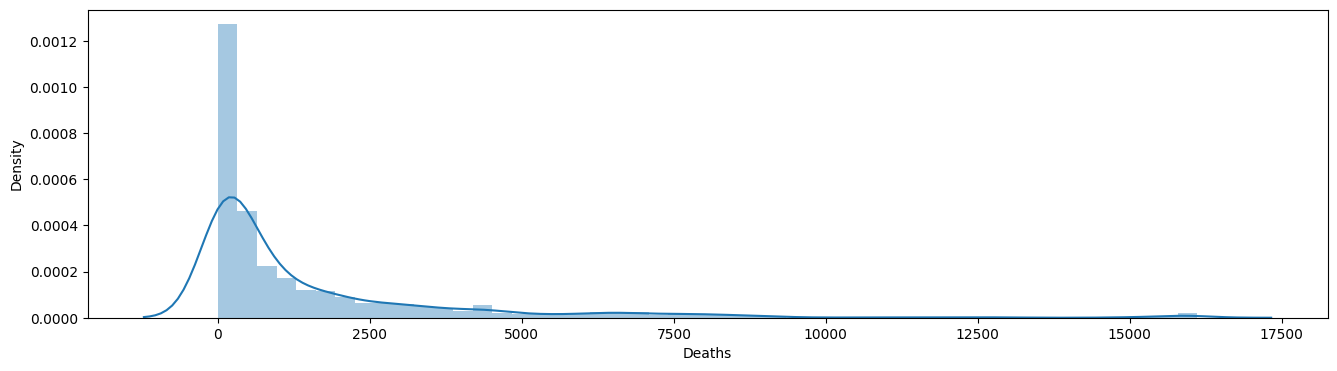

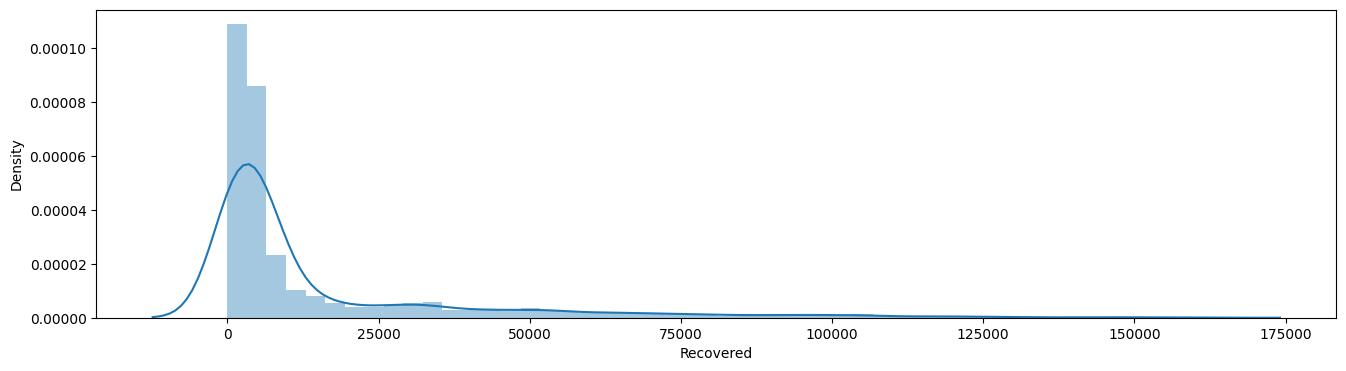

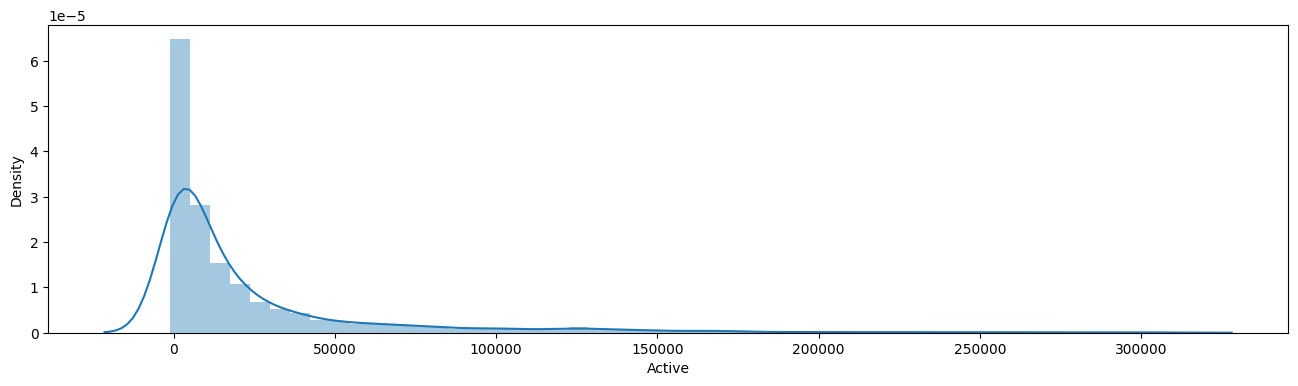

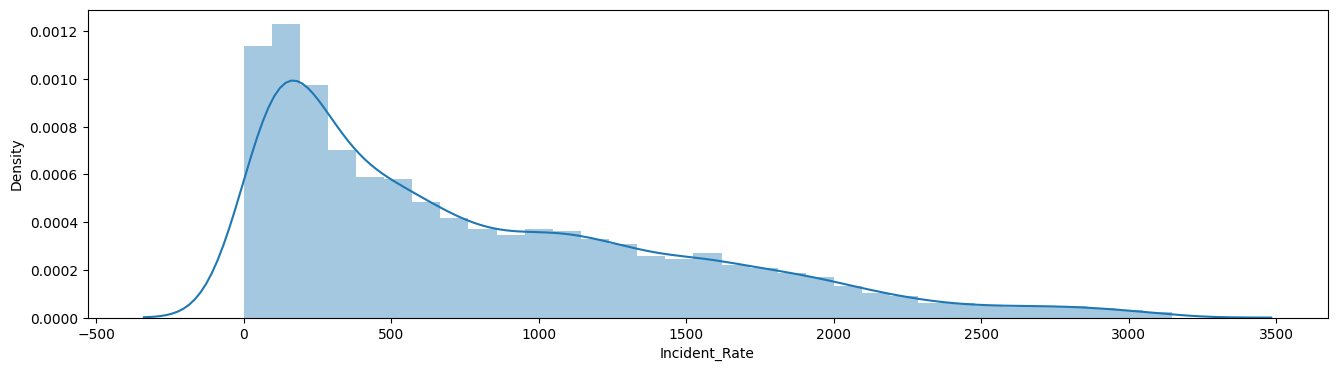

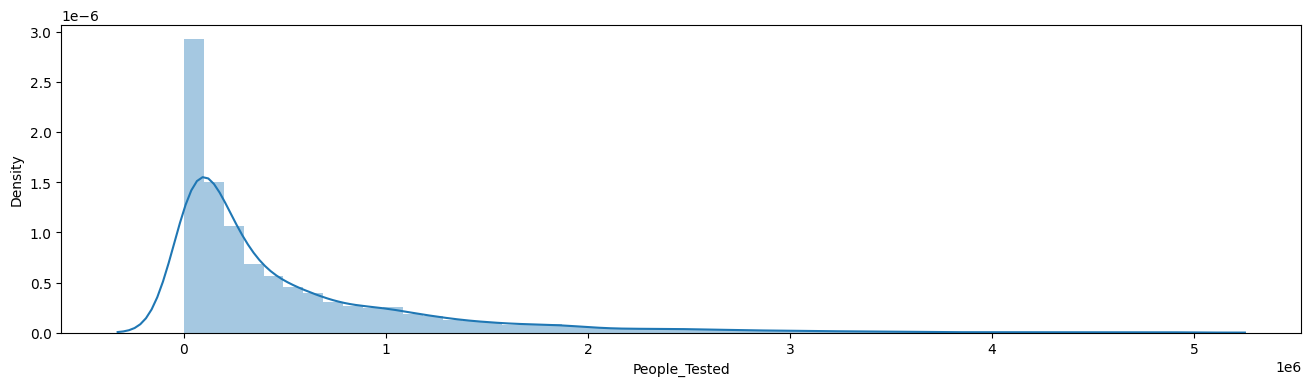

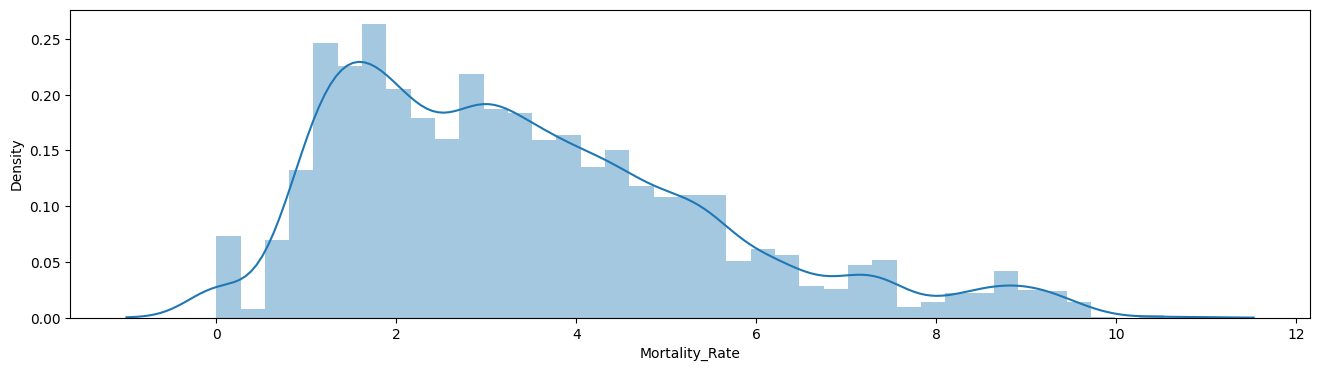

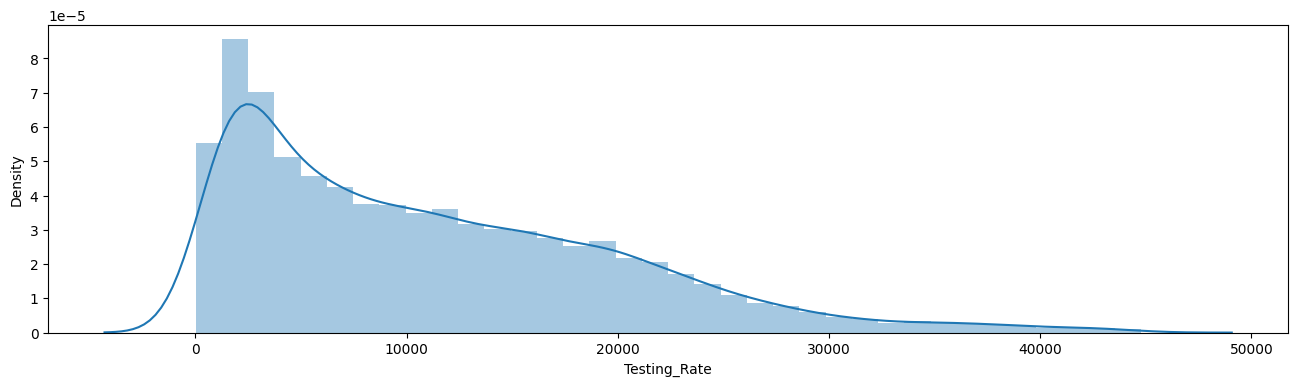

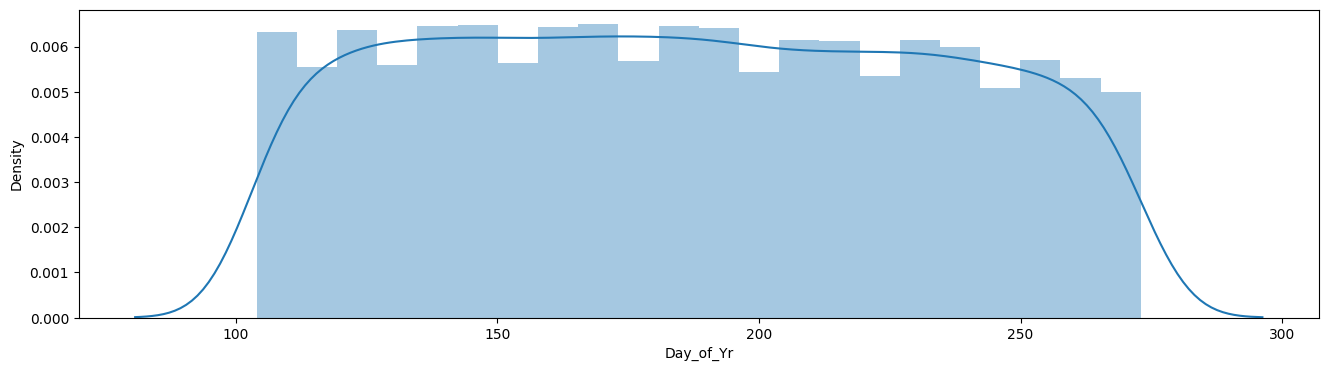

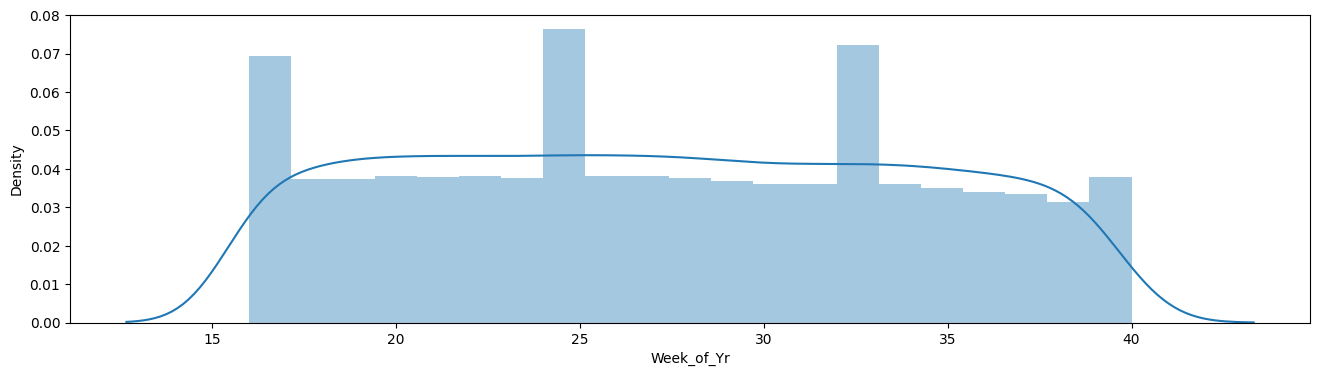

In [120]:
for col in df_cleaned.columns:
    fig_this_size(16,4)
    sns.distplot(df_cleaned[col])

In [121]:
# skew stats

df_cleaned.skew()

Confirmed         1.903769
Deaths            3.010758
Recovered         2.544725
Active            3.072293
Incident_Rate     1.002070
People_Tested     2.391895
Mortality_Rate    0.840766
Testing_Rate      0.957526
Day_of_Yr         0.043645
Week_of_Yr        0.047512
dtype: float64

In [122]:
# addressing the skew

In [123]:
# try1 : log transformation
np.log1p(df_cleaned).skew()

Confirmed        -1.473078
Deaths           -0.764815
Recovered        -1.599075
Active           -1.069327
Incident_Rate    -1.757467
People_Tested    -1.368041
Mortality_Rate   -0.283338
Testing_Rate     -1.280323
Day_of_Yr        -0.298545
Week_of_Yr       -0.272265
dtype: float64

In [124]:
# try2 : sqrt transformation
np.sqrt(df_cleaned).skew()

Confirmed         0.730056
Deaths            1.249484
Recovered         1.340382
Active            1.364995
Incident_Rate     0.240050
People_Tested     0.945558
Mortality_Rate   -0.149034
Testing_Rate      0.166366
Day_of_Yr        -0.125479
Week_of_Yr       -0.116426
dtype: float64

In [125]:
# try3 : cbrt transformaiton
np.sqrt(df_cleaned).skew()

Confirmed         0.730056
Deaths            1.249484
Recovered         1.340382
Active            1.364995
Incident_Rate     0.240050
People_Tested     0.945558
Mortality_Rate   -0.149034
Testing_Rate      0.166366
Day_of_Yr        -0.125479
Week_of_Yr       -0.116426
dtype: float64

* The square root transformation is giving us the best results, let's go with that.

In [126]:
df_cleaned = np.sqrt(df_cleaned)

In [127]:
df_cleaned.isna().sum()

Confirmed         0
Deaths            0
Recovered         0
Active            1
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
Testing_Rate      0
Day_of_Yr         0
Week_of_Yr        0
dtype: int64

In [128]:
df_cleaned.dropna(inplace=True)

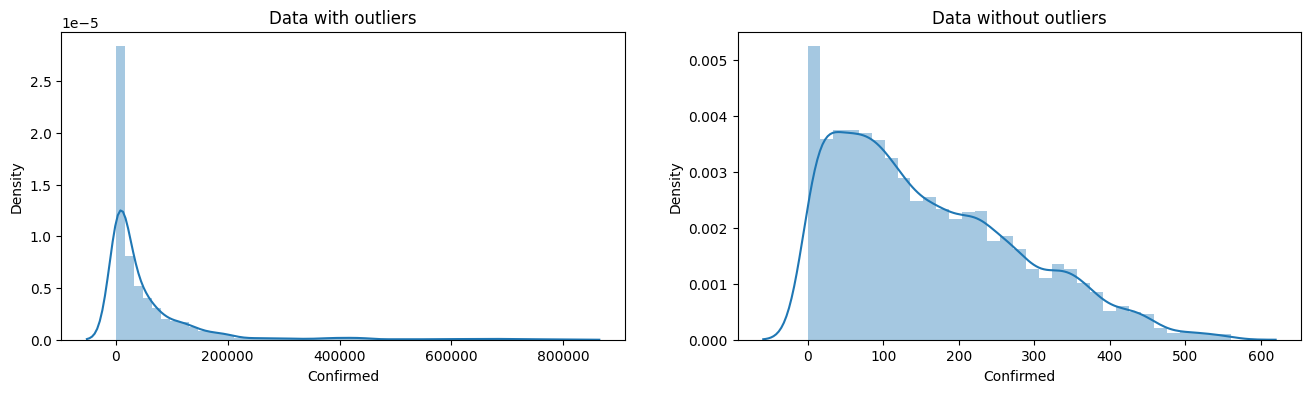

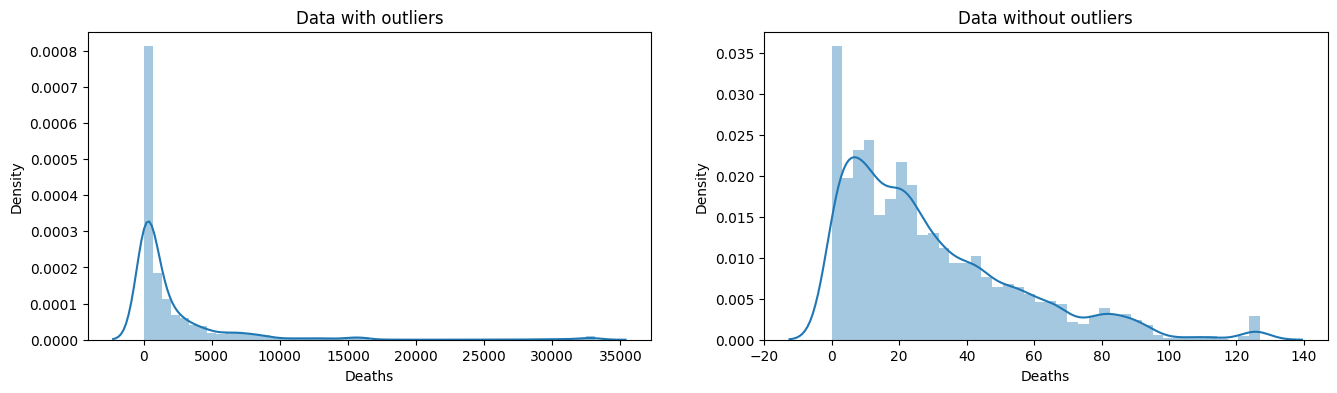

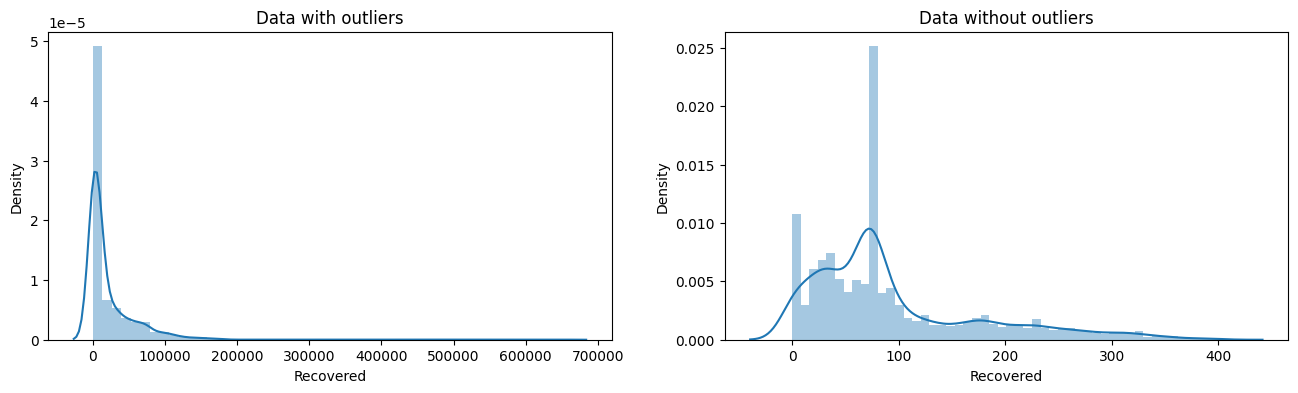

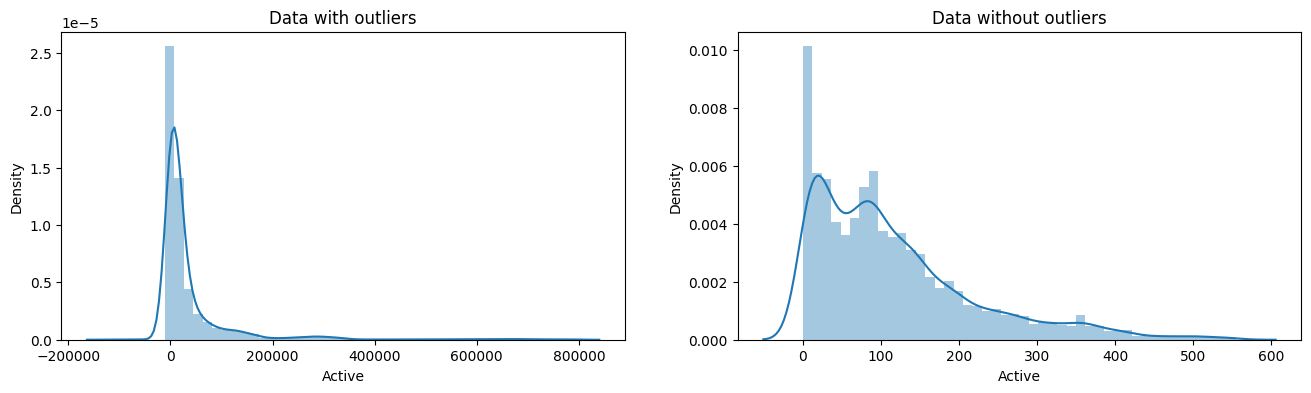

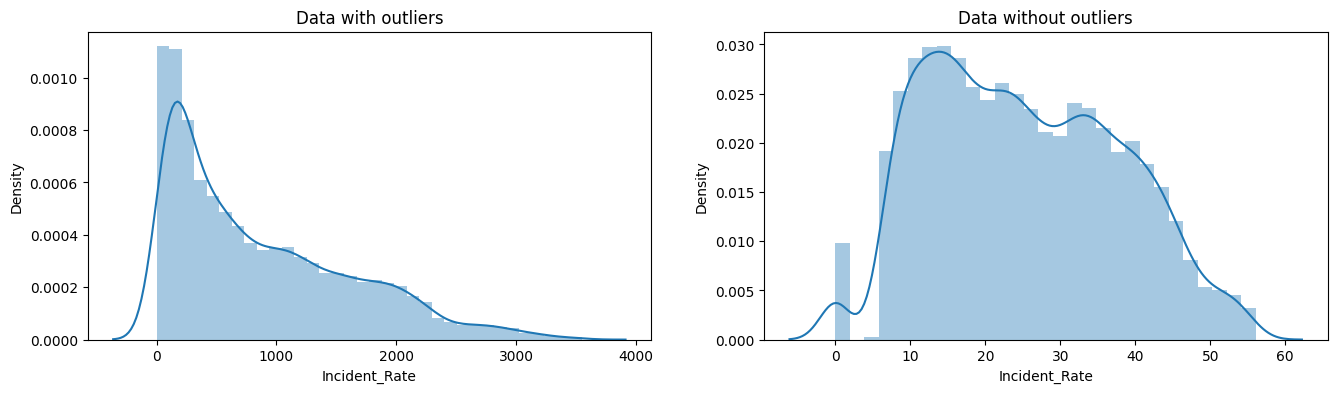

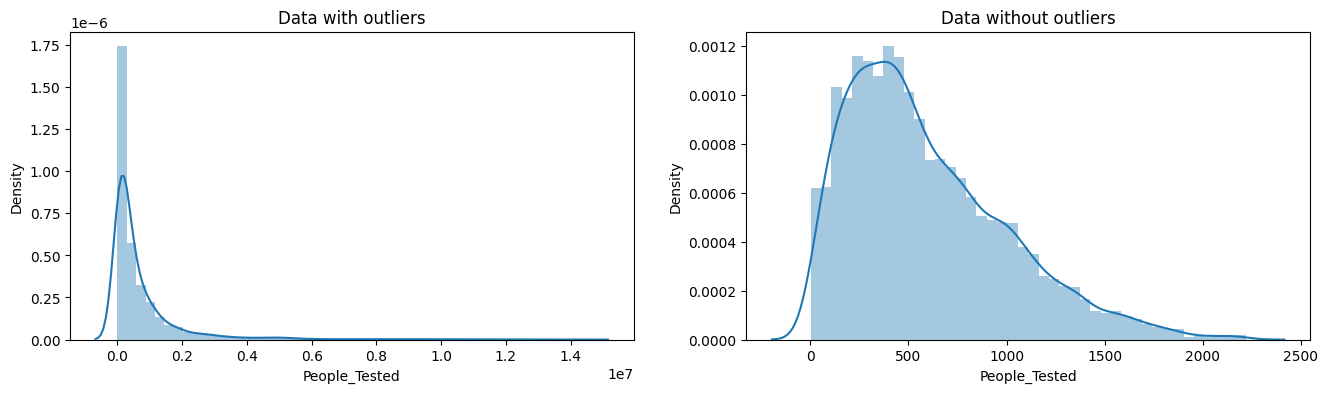

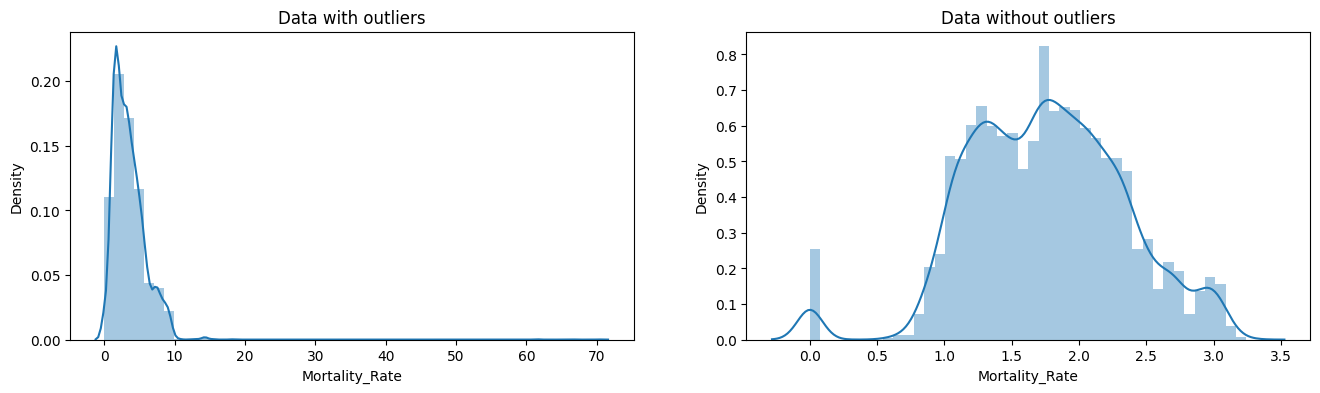

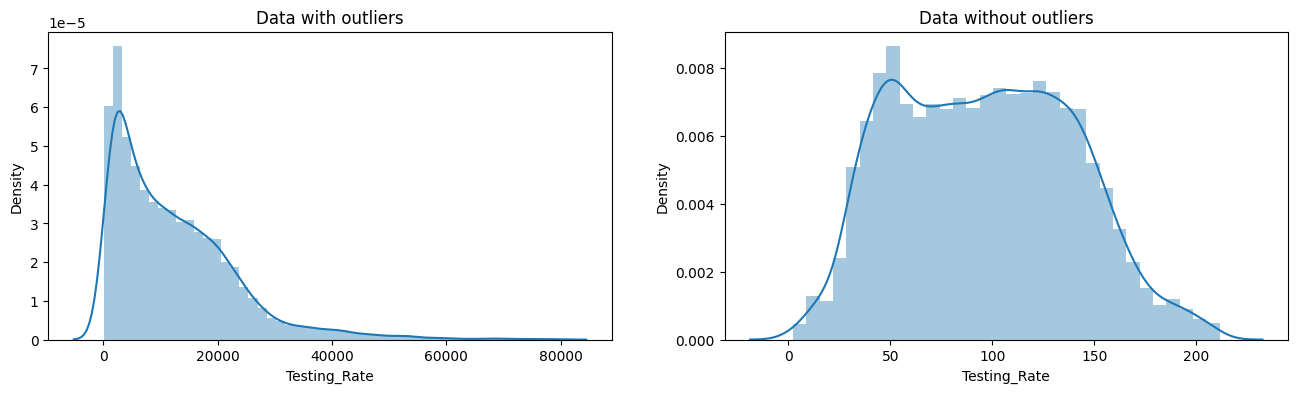

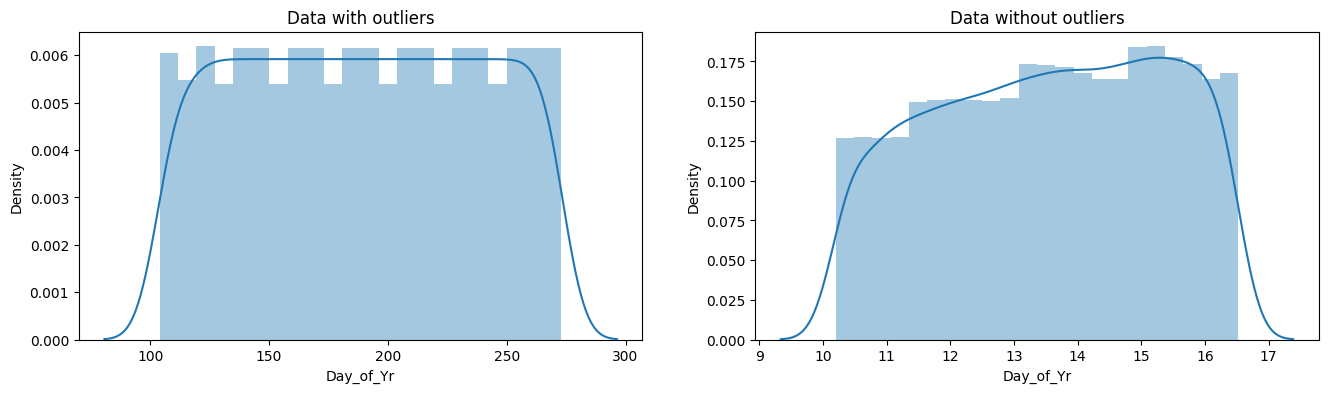

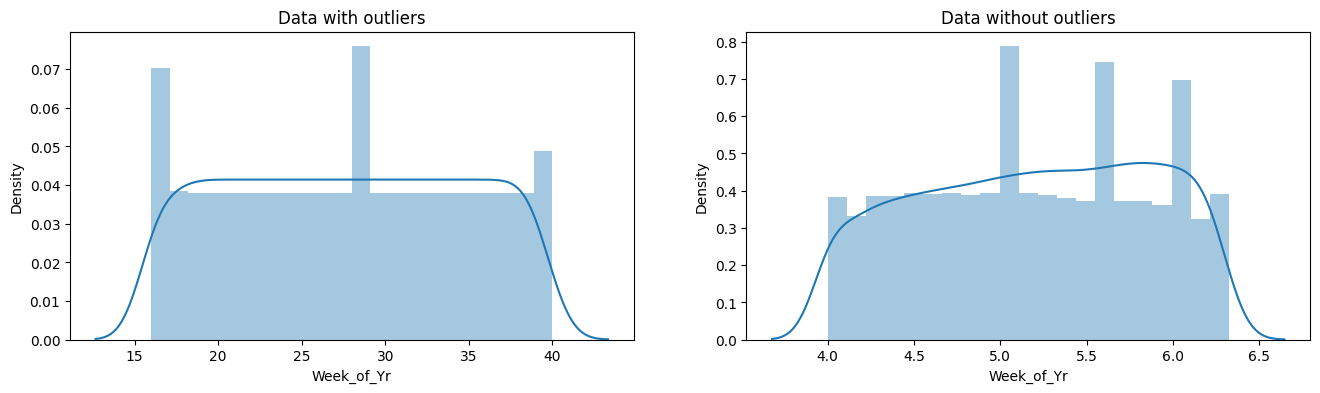

In [129]:
# before and after transforamtion
# before and after removing the outliers
for col in df_cleaned:
    fig = fig_this_size(16,4)
    
    fig.add_subplot(121)
    sns.distplot(df[col])
    plt.title('Data with outliers')
    
    fig.add_subplot(122)
    sns.distplot(df_cleaned[col])
    plt.title('Data without outliers')

In [130]:
df_cleaned.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,Day_of_Yr,Week_of_Yr
0,93.225533,18.520259,73.252986,91.367390,13.614432,330.932017,1.986608,48.328514,11.313708,4.358899
1,19.287302,3.162278,16.852300,8.831761,7.888820,153.801821,1.639565,62.907445,11.313708,4.358899
2,0.000000,0.000000,0.000000,0.000000,0.000000,9.110434,1.983812,12.213541,11.313708,4.358899
3,98.524109,20.639767,41.146081,87.109127,11.548221,302.881165,2.094895,35.501348,11.313708,4.358899
4,60.091597,9.327379,45.923850,37.616486,11.809879,242.905331,1.552194,47.738499,11.313708,4.358899


## Feature and Target split

* We will find the morality rate in the The States.

In [131]:
X = df_cleaned.drop('Mortality_Rate',1)
y = df_cleaned['Mortality_Rate']

## Train test split

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## Building up the model

In [133]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [134]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [135]:
# helper function
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(y_test,y_preds))
    print('R2_Score',r2_score(y_test,y_preds))  

In [136]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 0.11565397970657573
R2_Score 0.6614176759349064


In [137]:
# try2: Ridge Regression
train_n_ret_scores(Ridge(alpha=0.001))

MSE: 0.11565396416765739
R2_Score 0.6614177214258018


In [138]:
# try3: Lasso Regression
train_n_ret_scores(Lasso(alpha=0.00003))

MSE: 0.1156311502463739
R2_Score 0.661484510225537


In [139]:
# ElasticNet
train_n_ret_scores(ElasticNet(alpha=0.0001))

MSE: 0.11562011559779264
R2_Score 0.6615168146647907


In [140]:
# try4: SVR
train_n_ret_scores(SVR())

MSE: 0.09736534349243049
R2_Score 0.7149584963120046


In [141]:
# try5: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 0.019479322708910035
R2_Score 0.9429733903603689


In [142]:
# try6: Random Forest
train_n_ret_scores(RandomForestRegressor())

MSE: 0.009395188595248908
R2_Score 0.9724951549641454


In [143]:
# try7: Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor())

MSE: 0.022193453830525425
R2_Score 0.9350276471589208


In [144]:
# try3: Adaboost

train_n_ret_scores(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()))

MSE: 0.012202509659289006
R2_Score 0.9642765939369234


In [145]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),ElasticNet(alpha=0.0001),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso ElasticNet SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test,y_preds)
    r2 = r2_score(y_test,y_preds)
    avgCV = np.mean(cross_val_score(model,X,y,scoring='r2'))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
 

In [146]:
models_df

,Model,MSE,R2,meanCV
0,Linear,0.115654,0.661418,0.645883
1,Ridge,0.115654,0.661418,0.645883
2,Lasso,0.115604,0.661564,0.646025
3,ElasticNet,0.115620,0.661517,0.645952
4,SVR,0.097365,0.714958,0.708573
5,Descision_Tree,0.018351,0.946277,0.951078
6,Random_Forest,0.009306,0.972757,0.972695
7,Gradient_Boost,0.022229,0.934925,0.928331
8,Ada_Boost,0.122908,0.640181,0.632719


* Random forest gives us the best cross_val_score,so lets continue with Random Forest as the best model.

In [148]:
best_model = RandomForestRegressor()

In [149]:
best_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [152]:
best_model.feature_importances_

array([0.15686488, 0.44552019, 0.03879963, 0.1062266 , 0.07521255,
       0.03243149, 0.01227401, 0.12531102, 0.00735963])

In [154]:
best_model.score(X_test,y_test)

0.9724787376760764

In [156]:
# let's plot the feature impiortance
feat_imp = pd.DataFrame(zip(X_train.columns,best_model.feature_importances_),columns=['Feature','Importance_Value'])

In [157]:
feat_imp

,Feature,Importance_Value
0,Confirmed,0.156865
1,Deaths,0.445520
2,Recovered,0.038800
3,Active,0.106227
4,Incident_Rate,0.075213
5,People_Tested,0.032431
6,Testing_Rate,0.012274
7,Day_of_Yr,0.125311
8,Week_of_Yr,0.007360


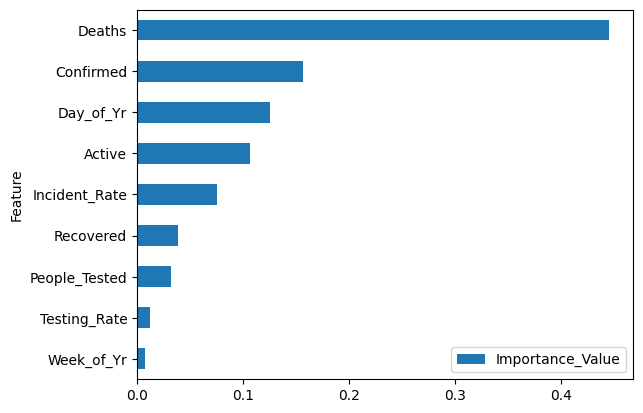

In [164]:
feat_imp.sort_values('Importance_Value').plot.barh('Feature')

In [165]:
# Saving the best model.
import joblib
joblib.dump(best_model,'Covid_US.pkl')

['Covid_US.pkl']